# Point Machine Data Analysis

## 1) Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import ast
import statistics as stat
from random import randint
from tqdm import tqdm

%matplotlib inline

## 2) Reading the datafile

In [2]:
filename = 'Point Machine Data.xlsx'
df = pd.read_excel(filename)

print(f"dataframe details Rows = {df.shape[0]} and Cols = {df.shape[1]}")
print(f"Col names = {df.columns}")
df.head()

dataframe details Rows = 100 and Cols = 21
Col names = Index(['Id', 'ReceivedTime', 'StationCode', 'Version', 'Location',
       'SubmittedTime', 'Temperature', 'Humidity', 'SignalStrength',
       'DeviceId', 'GearName', 'OperatingPeriod', 'EventType', 'EventData',
       'PeakCurrent', 'Current', 'VRR', 'Direction', 'VoltageNormal',
       'VoltageReverse', 'ReferenceId'],
      dtype='object')


Id             ReceivedTime StationCode  Version Location  \
0  32449  2020-05-04 15:30:00.000        VRBD     2.13    L-53A   
1  32448  2020-05-04 15:30:00.000        VRBD     2.13    L-53A   
2  32447  2020-05-04 15:30:00.000        VRBD     2.13     L-23   
3  32446  2020-05-04 15:30:00.000        VRBD     2.13     L-23   
4  32445  2020-05-04 15:30:00.000        VRBD     2.13    L-53A   

             SubmittedTime  Temperature  Humidity  SignalStrength  DeviceId  \
0  2020-05-04 15:29:48.000           37        17               0       NaN   
1  2020-05-04 15:29:43.000           37        17               0       NaN   
2  2020-05-04 15:29:35.000           47        22              19       NaN   
3  2020-05-04 15:29:30.000           47        22              19       NaN   
4  2020-05-04 15:29:00.000           37        17               0       NaN   

   ... OperatingPeriod  EventType  \
0  ...            4000          3   
1  ...            3900          3   
2  ...            4100          3   
3  ...            3800          3   
4  ...            3600          3   

                                           EventData PeakCurrent  Current  \
0  [{"IDX":"001","VN":"077.50","VR":"010.24","VRR...       3.688    3.773   
1  [{"IDX":"001","VN":"083.54","VR":"016.66","VRR...       4.254    3.247   
2  [{"IDX":"001","VN":"057.39","VR":"016.49","VRR...       4.013    3.988   
3  [{"IDX":"001","VN":"058.58","VR":"015.69","VRR...       4.265    2.534   
4  [{"IDX":"001","VN":"016.66","VR":"079.47","VRR...       3.973    2.221   

     VRR  Direction VoltageNormal  VoltageReverse  ReferenceId  
0  27.47     NORMAL        119.83          104.03      2872551  
1   0.00     NORMAL        118.72          105.51      2872550  
2   0.00     NORMAL        120.15          103.75      2872547  
3   0.00     NORMAL        120.00          104.27      2872546  
4   0.00    REVERSE        109.58          119.58      2872543  

[5 rows x 21 columns]

In [3]:
df.dtypes

Id                   int64
ReceivedTime        object
StationCode         object
Version            float64
Location            object
SubmittedTime       object
Temperature          int64
Humidity             int64
SignalStrength       int64
DeviceId           float64
GearName            object
OperatingPeriod      int64
EventType            int64
EventData           object
PeakCurrent        float64
Current            float64
VRR                float64
Direction           object
VoltageNormal      float64
VoltageReverse     float64
ReferenceId          int64
dtype: object

## Let's try to see the data in terms of timeseries
From the dataset I am guessing that `'ReceivedTime'` is the time when the server received the data from logger and `'SubmittedTime'` is the time when the actual reading from point machine is taken. So **`'SubmittedTime'`** is our intrest from time series

In [4]:
# Converting ReceivedTime and SubmittedTime into pandas datetime
df['ReceivedTime'] = df['ReceivedTime'].apply(pd.to_datetime)
df['SubmittedTime'] = df['SubmittedTime'].apply(pd.to_datetime)
df.sort_values(by = ['ReceivedTime', 'SubmittedTime'])
df.head()

Id        ReceivedTime StationCode  Version Location  \
0  32449 2020-05-04 15:30:00        VRBD     2.13    L-53A   
1  32448 2020-05-04 15:30:00        VRBD     2.13    L-53A   
2  32447 2020-05-04 15:30:00        VRBD     2.13     L-23   
3  32446 2020-05-04 15:30:00        VRBD     2.13     L-23   
4  32445 2020-05-04 15:30:00        VRBD     2.13    L-53A   

        SubmittedTime  Temperature  Humidity  SignalStrength  DeviceId  ...  \
0 2020-05-04 15:29:48           37        17               0       NaN  ...   
1 2020-05-04 15:29:43           37        17               0       NaN  ...   
2 2020-05-04 15:29:35           47        22              19       NaN  ...   
3 2020-05-04 15:29:30           47        22              19       NaN  ...   
4 2020-05-04 15:29:00           37        17               0       NaN  ...   

  OperatingPeriod  EventType  \
0            4000          3   
1            3900          3   
2            4100          3   
3            3800          3   
4            3600          3   

                                           EventData PeakCurrent  Current  \
0  [{"IDX":"001","VN":"077.50","VR":"010.24","VRR...       3.688    3.773   
1  [{"IDX":"001","VN":"083.54","VR":"016.66","VRR...       4.254    3.247   
2  [{"IDX":"001","VN":"057.39","VR":"016.49","VRR...       4.013    3.988   
3  [{"IDX":"001","VN":"058.58","VR":"015.69","VRR...       4.265    2.534   
4  [{"IDX":"001","VN":"016.66","VR":"079.47","VRR...       3.973    2.221   

     VRR  Direction VoltageNormal  VoltageReverse  ReferenceId  
0  27.47     NORMAL        119.83          104.03      2872551  
1   0.00     NORMAL        118.72          105.51      2872550  
2   0.00     NORMAL        120.15          103.75      2872547  
3   0.00     NORMAL        120.00          104.27      2872546  
4   0.00    REVERSE        109.58          119.58      2872543  

[5 rows x 21 columns]

## 3) Data Vizualization

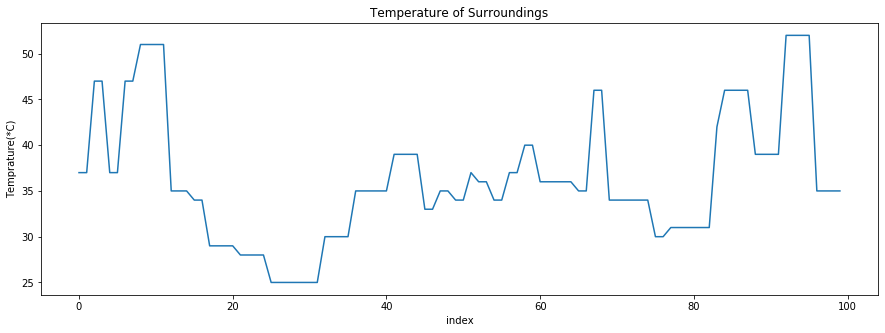

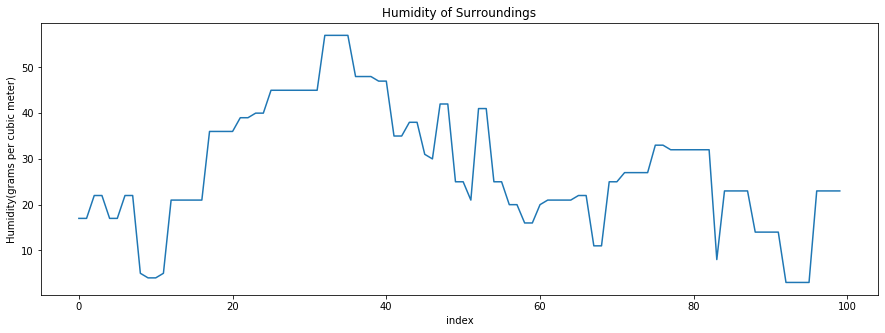

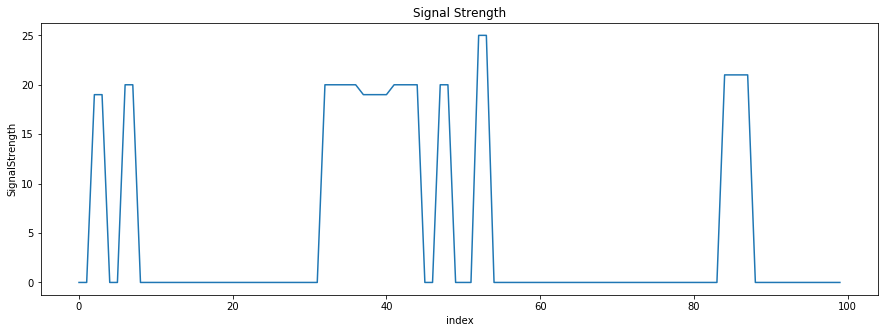

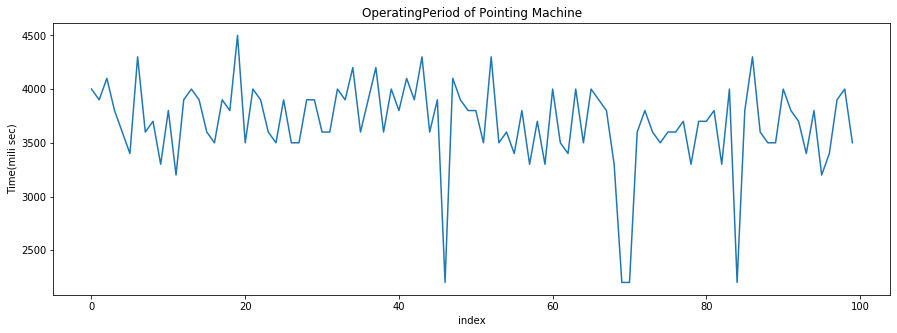

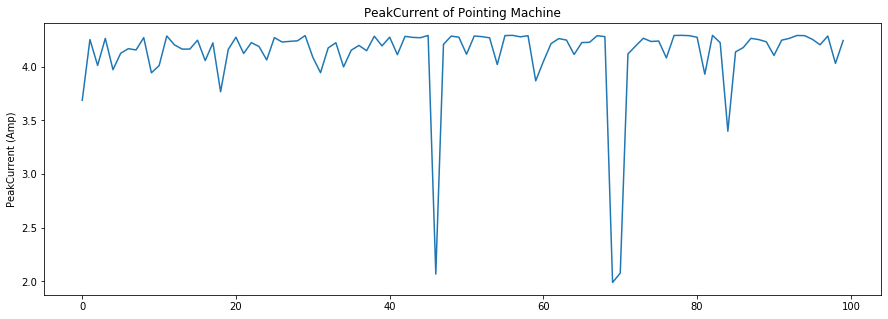

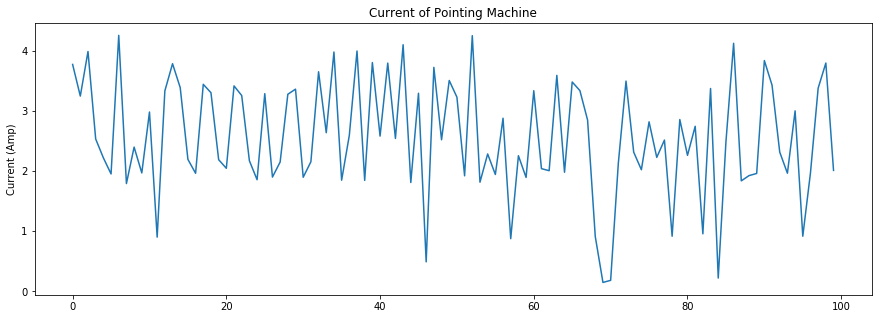

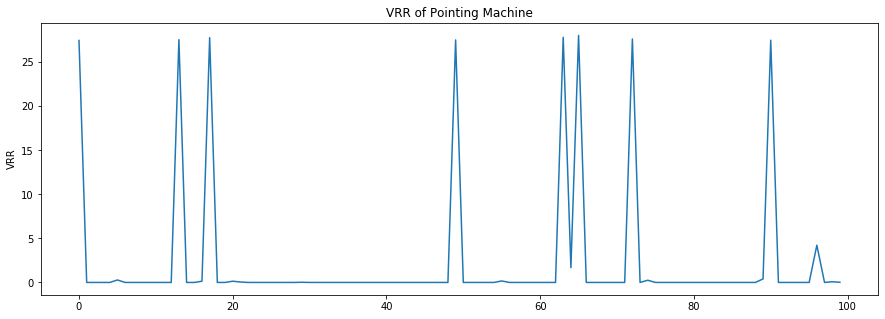

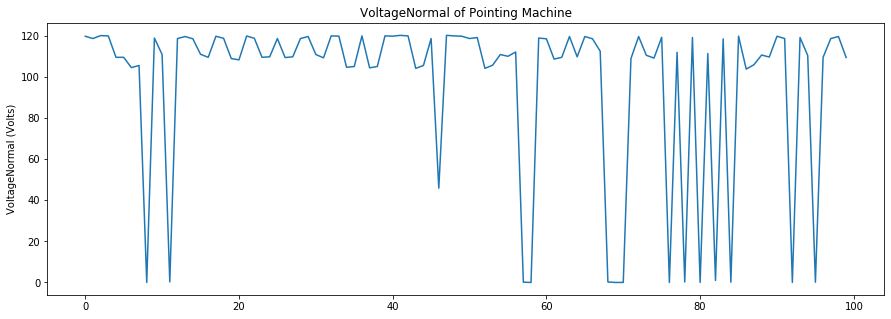

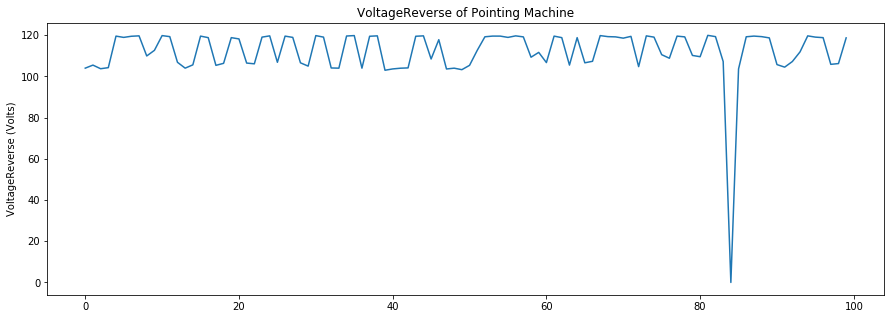

In [5]:
def plotData(y,x,graph_title = "", xlab = "", ylab = ""):
    plt.figure(figsize=(15,5))
    plt.plot(x,y)
    plt.title(graph_title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

plotData(df['Temperature'],df.index, graph_title="Temperature of Surroundings", xlab="index", ylab="Temprature(*C)")
plotData(df['Humidity'],df.index, graph_title="Humidity of Surroundings", xlab="index", ylab="Humidity(grams per cubic meter)")
plotData(df['SignalStrength'],df.index, graph_title="Signal Strength", xlab="index", ylab="SignalStrength")
plotData(df['OperatingPeriod'],df.index, graph_title="OperatingPeriod of Pointing Machine", xlab="index", ylab="Time(mili sec)")
plotData(df['PeakCurrent'],df.index, graph_title="PeakCurrent of Pointing Machine", ylab="PeakCurrent (Amp)")
plotData(df['Current'],df.index, graph_title="Current of Pointing Machine", ylab="Current (Amp)")
plotData(df['VRR'],df.index, graph_title="VRR of Pointing Machine", ylab="VRR")
plotData(df['VoltageNormal'],df.index, graph_title="VoltageNormal of Pointing Machine", ylab="VoltageNormal (Volts)")
plotData(df['VoltageReverse'],df.index, graph_title="VoltageReverse of Pointing Machine", ylab="VoltageReverse (Volts)")

**Drawing graphs togather to see any correlation**

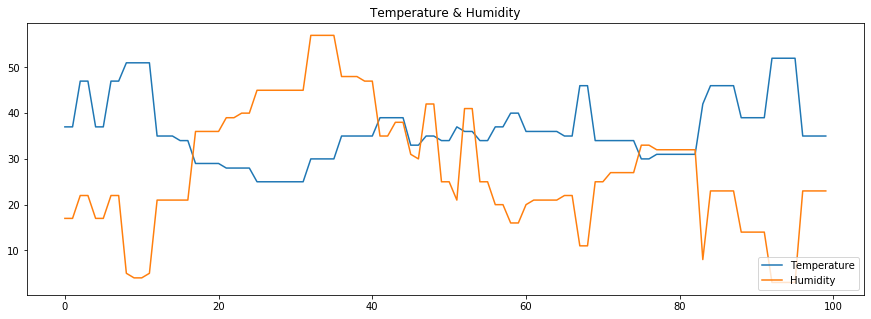

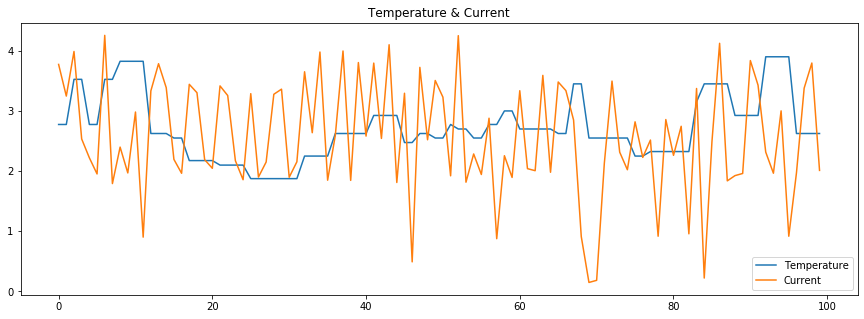

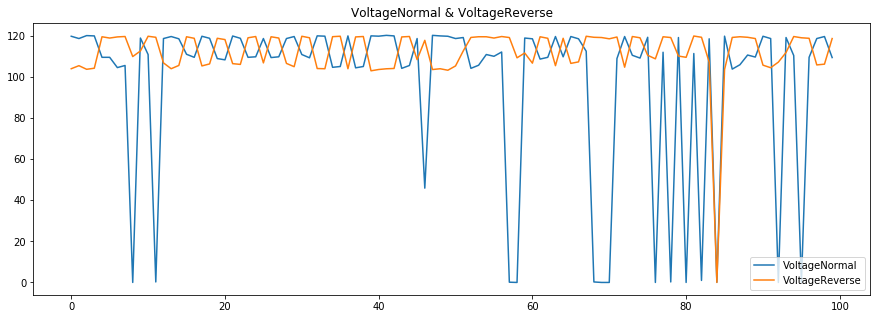

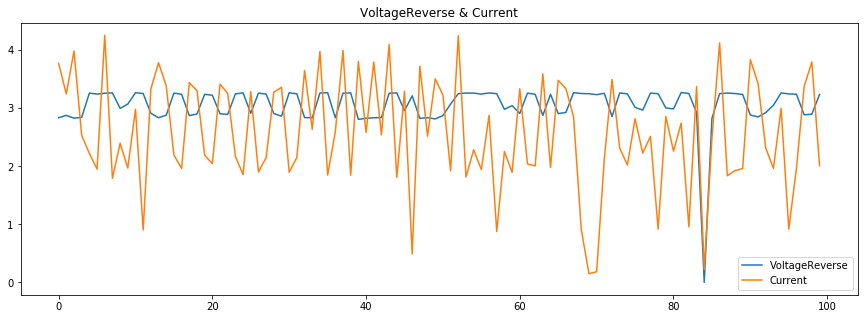

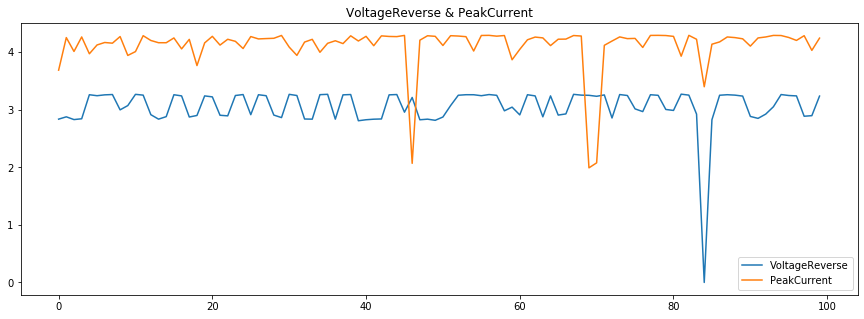

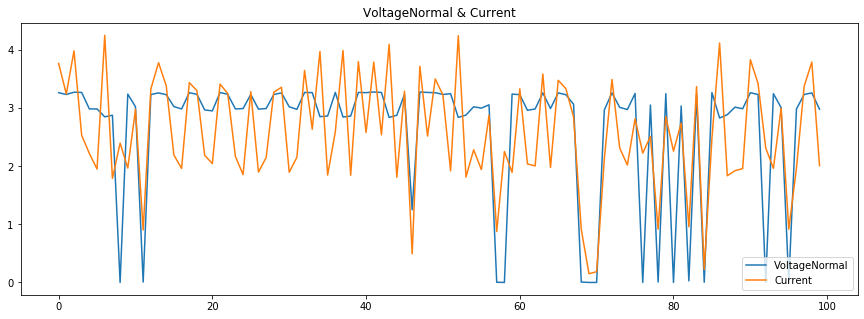

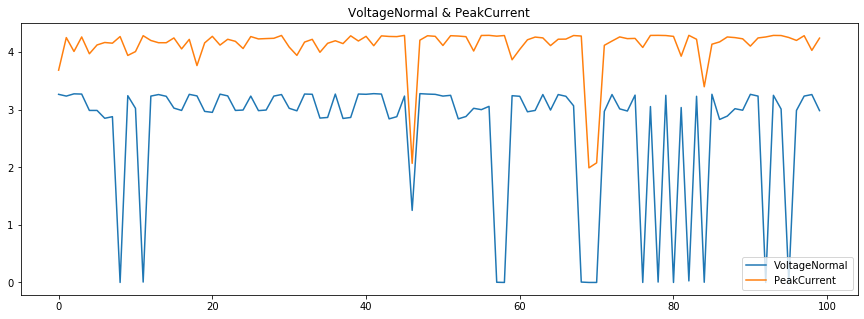

In [6]:
def corelatedGraph(parameter1, parameter2, scale = 1):
    plt.figure(figsize=(15,5))
    plt.plot(df.index, df[parameter1] * scale)
    plt.plot(df.index, df[parameter2])
    plt.title(f"{parameter1} & {parameter2}")
    plt.legend([parameter1, parameter2], loc='lower right')
    plt.show()
    
corelatedGraph('Temperature', 'Humidity')
corelatedGraph('Temperature', 'Current', scale=3/40)
corelatedGraph('VoltageNormal', 'VoltageReverse')
corelatedGraph('VoltageReverse', 'Current', scale = 3/110)
corelatedGraph('VoltageReverse', 'PeakCurrent', scale = 3/110)
corelatedGraph('VoltageNormal', 'Current', scale = 3/110)
corelatedGraph('VoltageNormal', 'PeakCurrent', scale = 3/110)

## Some Observation
- `Humidity` and `Temprature` have strong negative correlation
- low temprature doesn't affect the `current` very much but `high tempreture` may have relation
- The avg current is around 3 amp
- The `VoltageReverse` is quite stable but `VoltageNormal` fluctuates more
- `VoltageNormal` and `Current` might have a loose relation

### Getting the correlation matrix

In [7]:
corr = df.corr()

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'Version'),
 Text(2.5, 0, 'Temperature'),
 Text(3.5, 0, 'Humidity'),
 Text(4.5, 0, 'SignalStrength'),
 Text(5.5, 0, 'DeviceId'),
 Text(6.5, 0, 'OperatingPeriod'),
 Text(7.5, 0, 'EventType'),
 Text(8.5, 0, 'PeakCurrent'),
 Text(9.5, 0, 'Current'),
 Text(10.5, 0, 'VRR'),
 Text(11.5, 0, 'VoltageNormal'),
 Text(12.5, 0, 'VoltageReverse'),
 Text(13.5, 0, 'ReferenceId')]

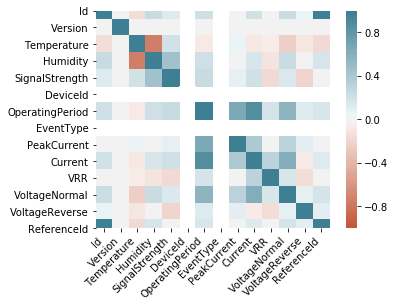

In [8]:
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20,220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## 4) Study of `EventData`

In [9]:
# lets calculate the avg time gap per observation
def getTimeGap():
    obsGapTimeList = list()
    for row in range(df.shape[0]):
        t = df['OperatingPeriod'][row]
        data = df['EventData'][row]
        data = ast.literal_eval(data)
        obsGapTimeList.append(int(t)/len(data))
    print(f"Average time gap between per obs = {np.round(np.mean(obsGapTimeList))} mili seconds")
    return np.round(np.mean(obsGapTimeList))
time_gap = getTimeGap()

Average time gap between per obs = 29.0 mili seconds


`EventData` is a list of json objects, having a certain number of data observation.
e.g. First row observation we have Time as 4000ms and our event has 130 obs so each obs is taken after 30.76ms
       second row has 3900ms/129 obs that means around one obs in every 30.23ms
Each Observation is taken in average of around **29 mili sec**. To vizualize the data we need to maintain the 29 ms time gap

In [10]:
# Let's prepare a list that has the reading time when the observation is taken
maximum_operatingPeriod = max(df['OperatingPeriod'])
print(f"Maximum Operating Period = {maximum_operatingPeriod} milisec and maximum len possible = {np.ceil(maximum_operatingPeriod/time_gap)}")
reading_time = [time_gap * i for i in range(int(np.ceil(maximum_operatingPeriod/time_gap)))]

Maximum Operating Period = 4500 milisec and maximum len possible = 156.0


In [11]:
def getParameter(param_name, row):
    list_events = df['EventData'][row]
    list_events = ast.literal_eval(list_events)
    req_parameter = list()
    for event in list_events:
        req_parameter.append(float(event[param_name]))
        
    # adding zeros at last to make same size list for all events
    actual_len = len(req_parameter)
    for i in range(len(reading_time) - actual_len):
        req_parameter.append(0)
    return req_parameter

### IP vs Operating Time Of Point Machine

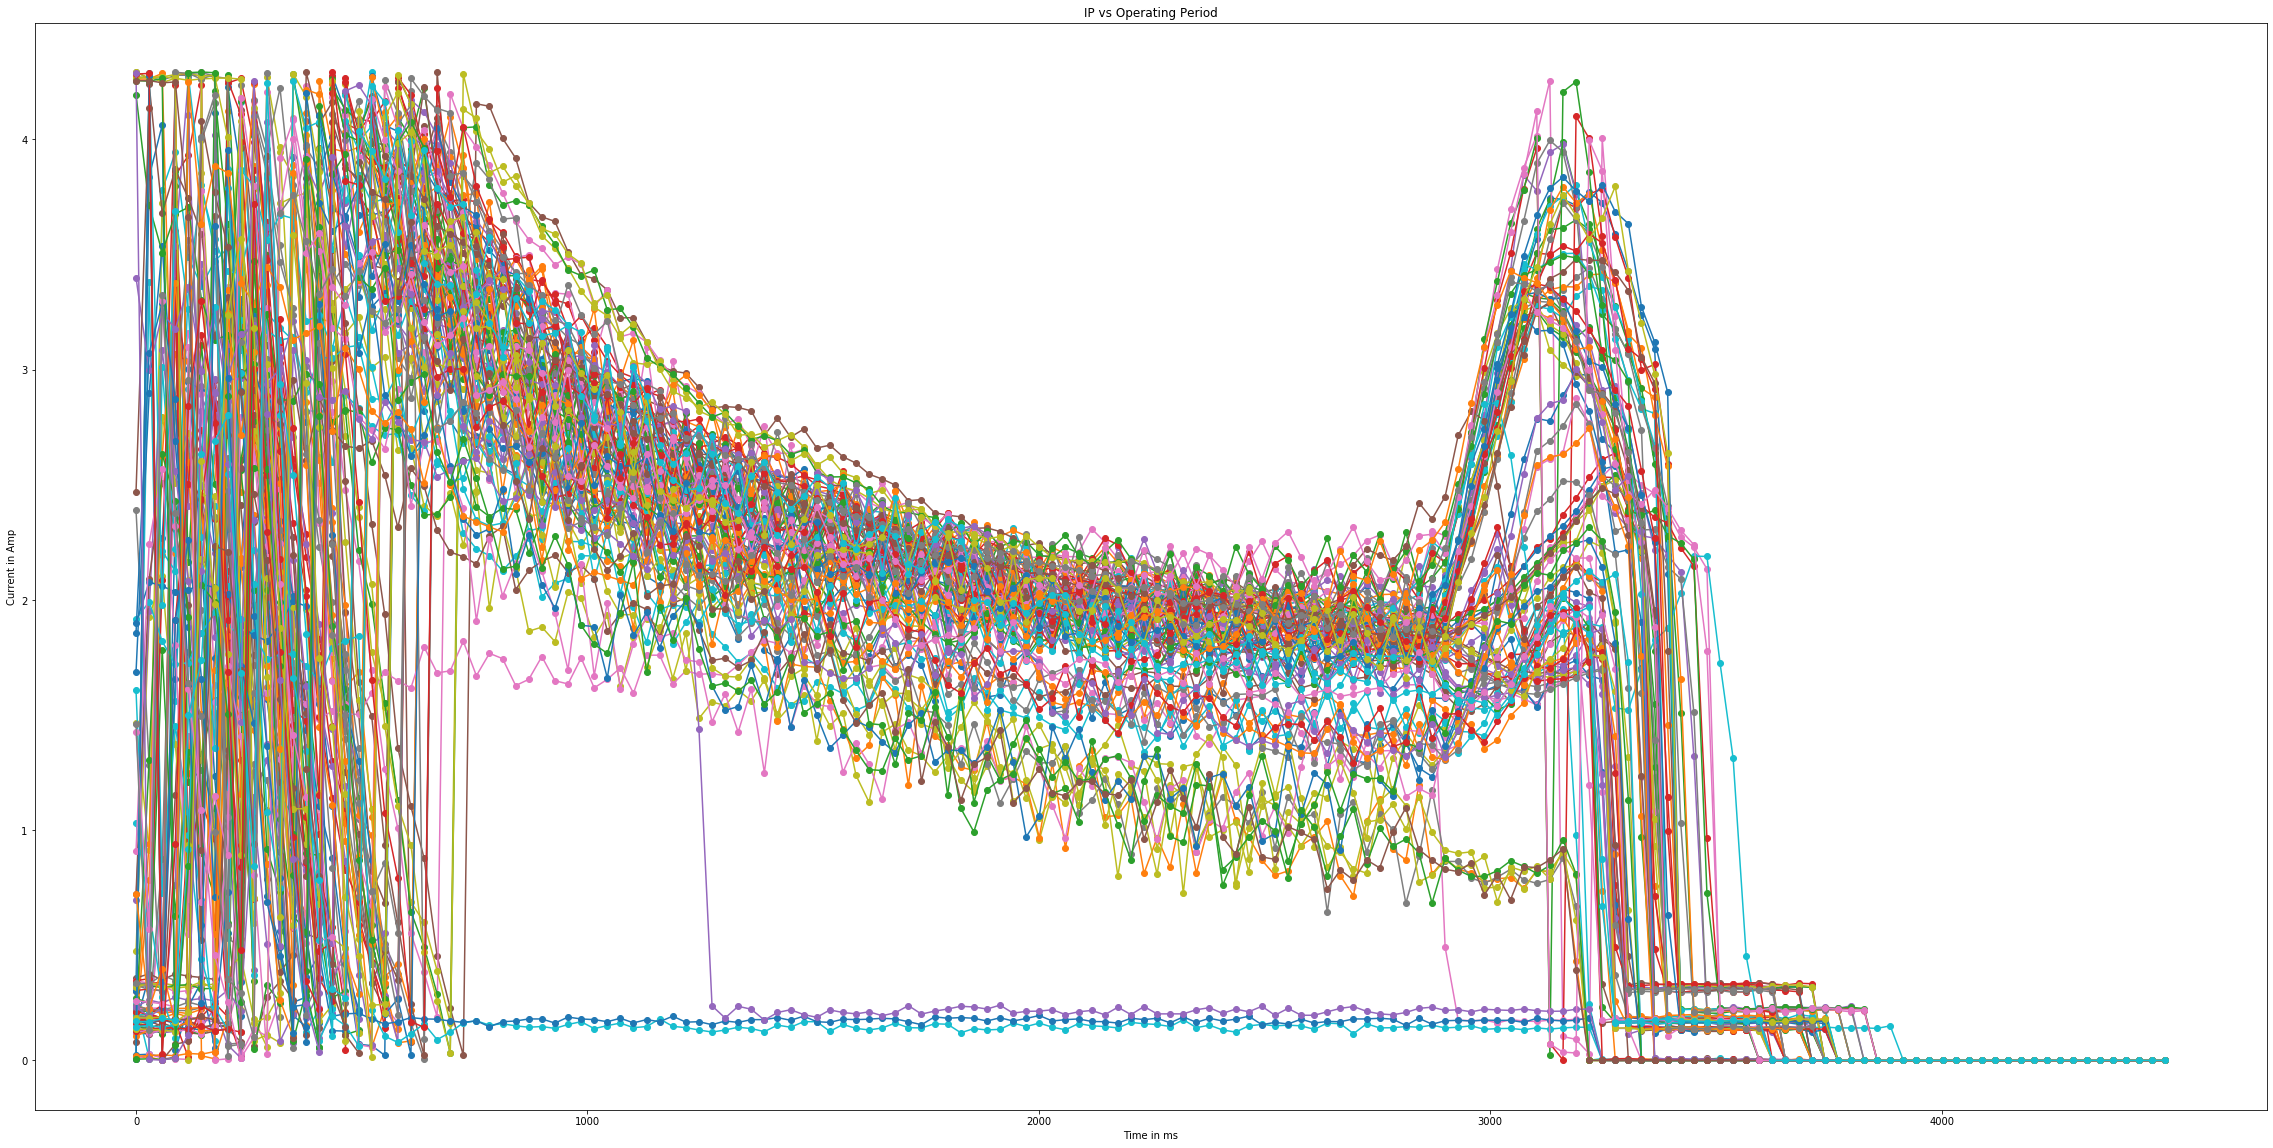

In [12]:
# Vizualizing Current
plt.figure(figsize=(40,20))
for row in range(df.shape[0]):
    plt.plot(reading_time, getParameter('IP', row), linestyle='-', marker='o')
plt.title("IP vs Operating Period")
plt.xlabel("Time in ms")
plt.ylabel("Current in Amp")
plt.show()

## Observation :
 - `IP` starts with a fluctualtion ranging from 0-4 Amp current for first 0.6 sec. Then it gradually perform it's task with a little decending gradiant and after 3 sec the current value again reach a pic(not as high as starting time) and then go to zero
 
 - There are some abd current value as we can see in bottom 3-4 lines **skyblue, blue, purple**

### VoltageNormal vs Operating Time Of Point Machine
### VoltageReverse vs Operating Time Of Point Machine

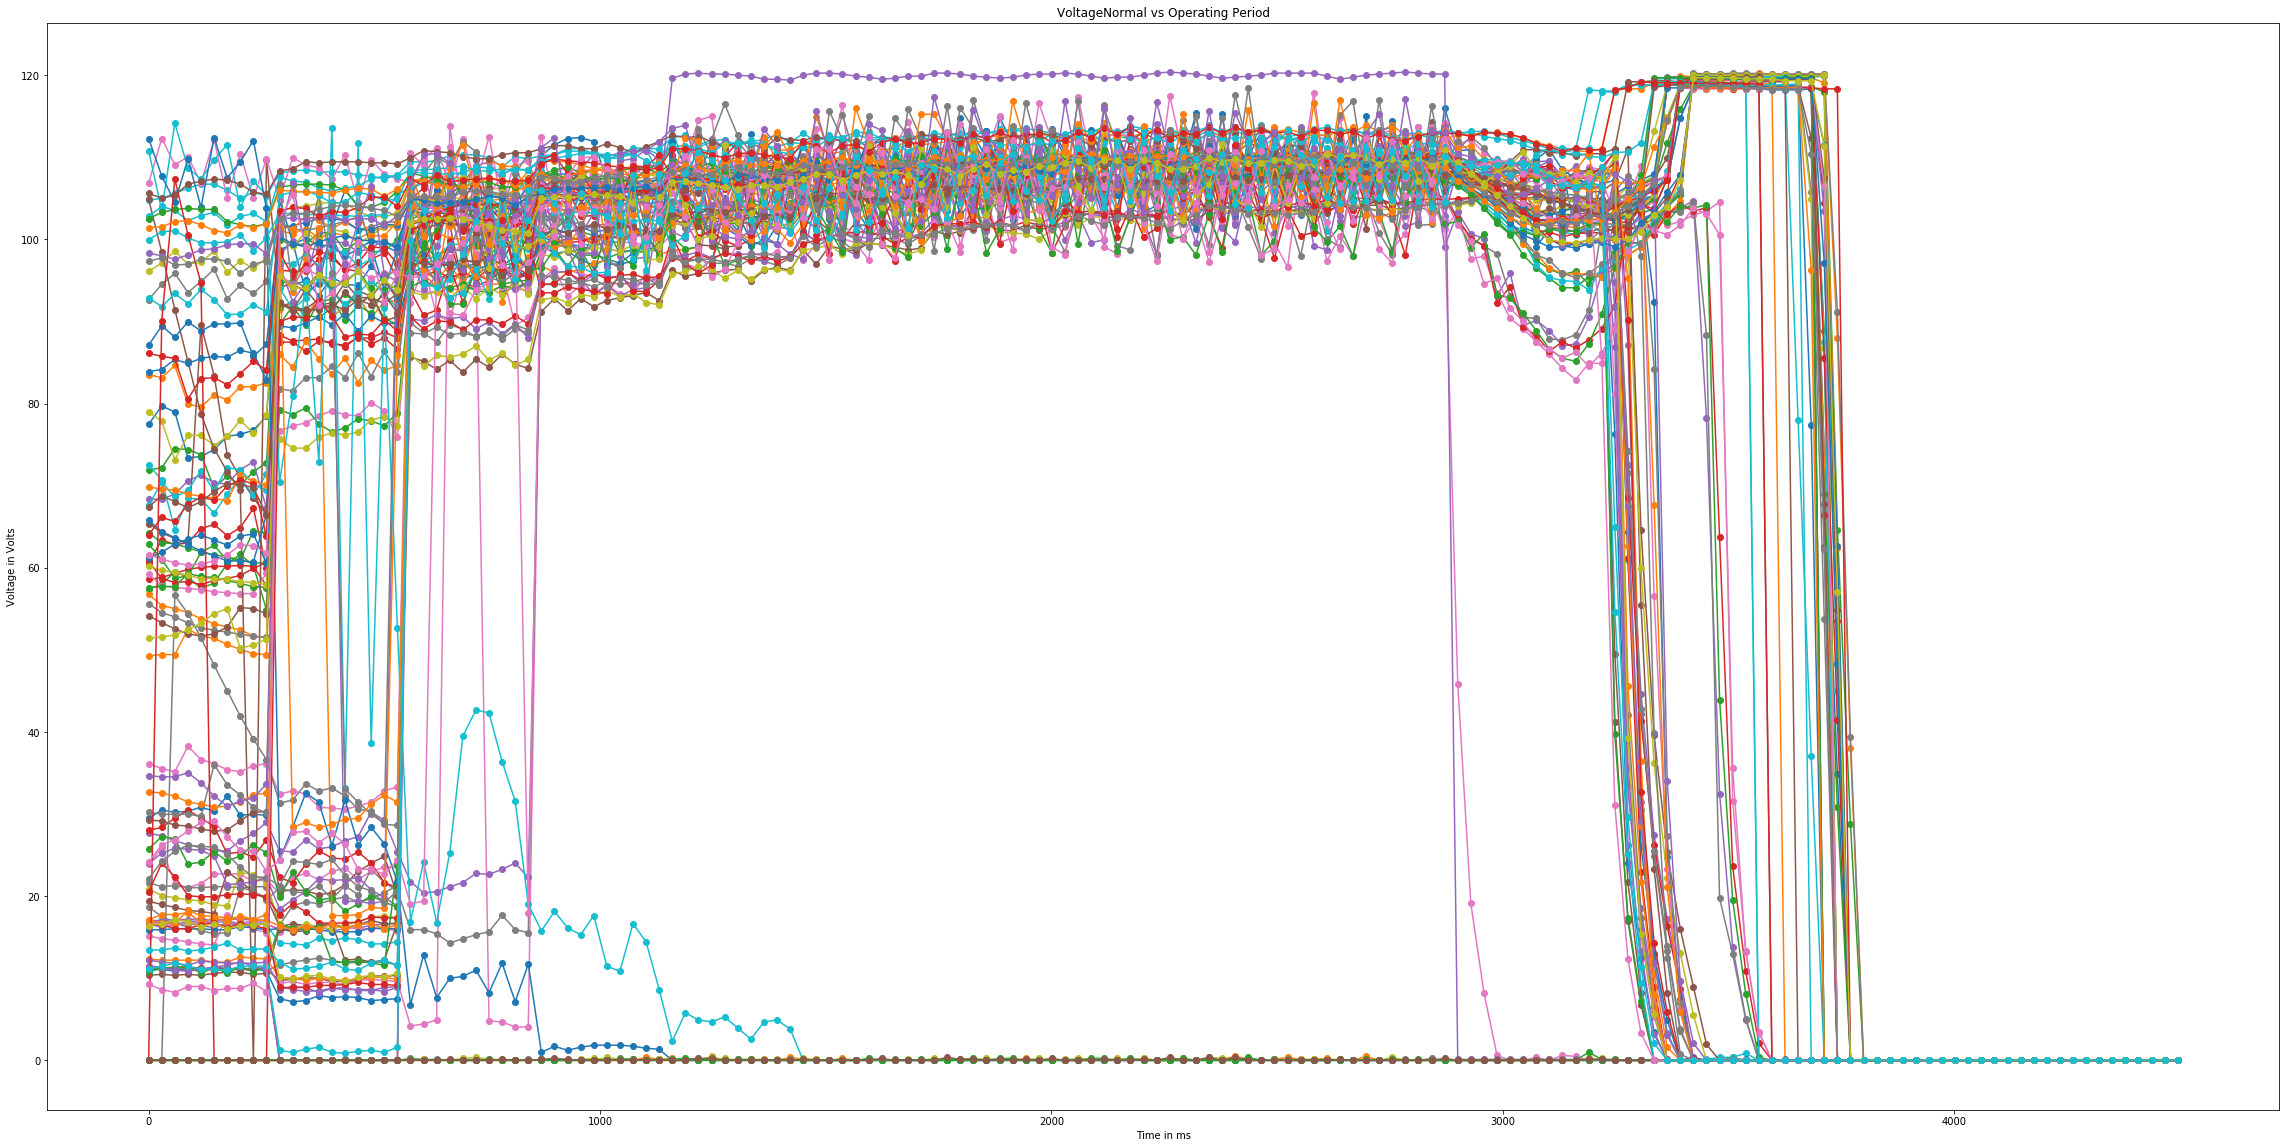

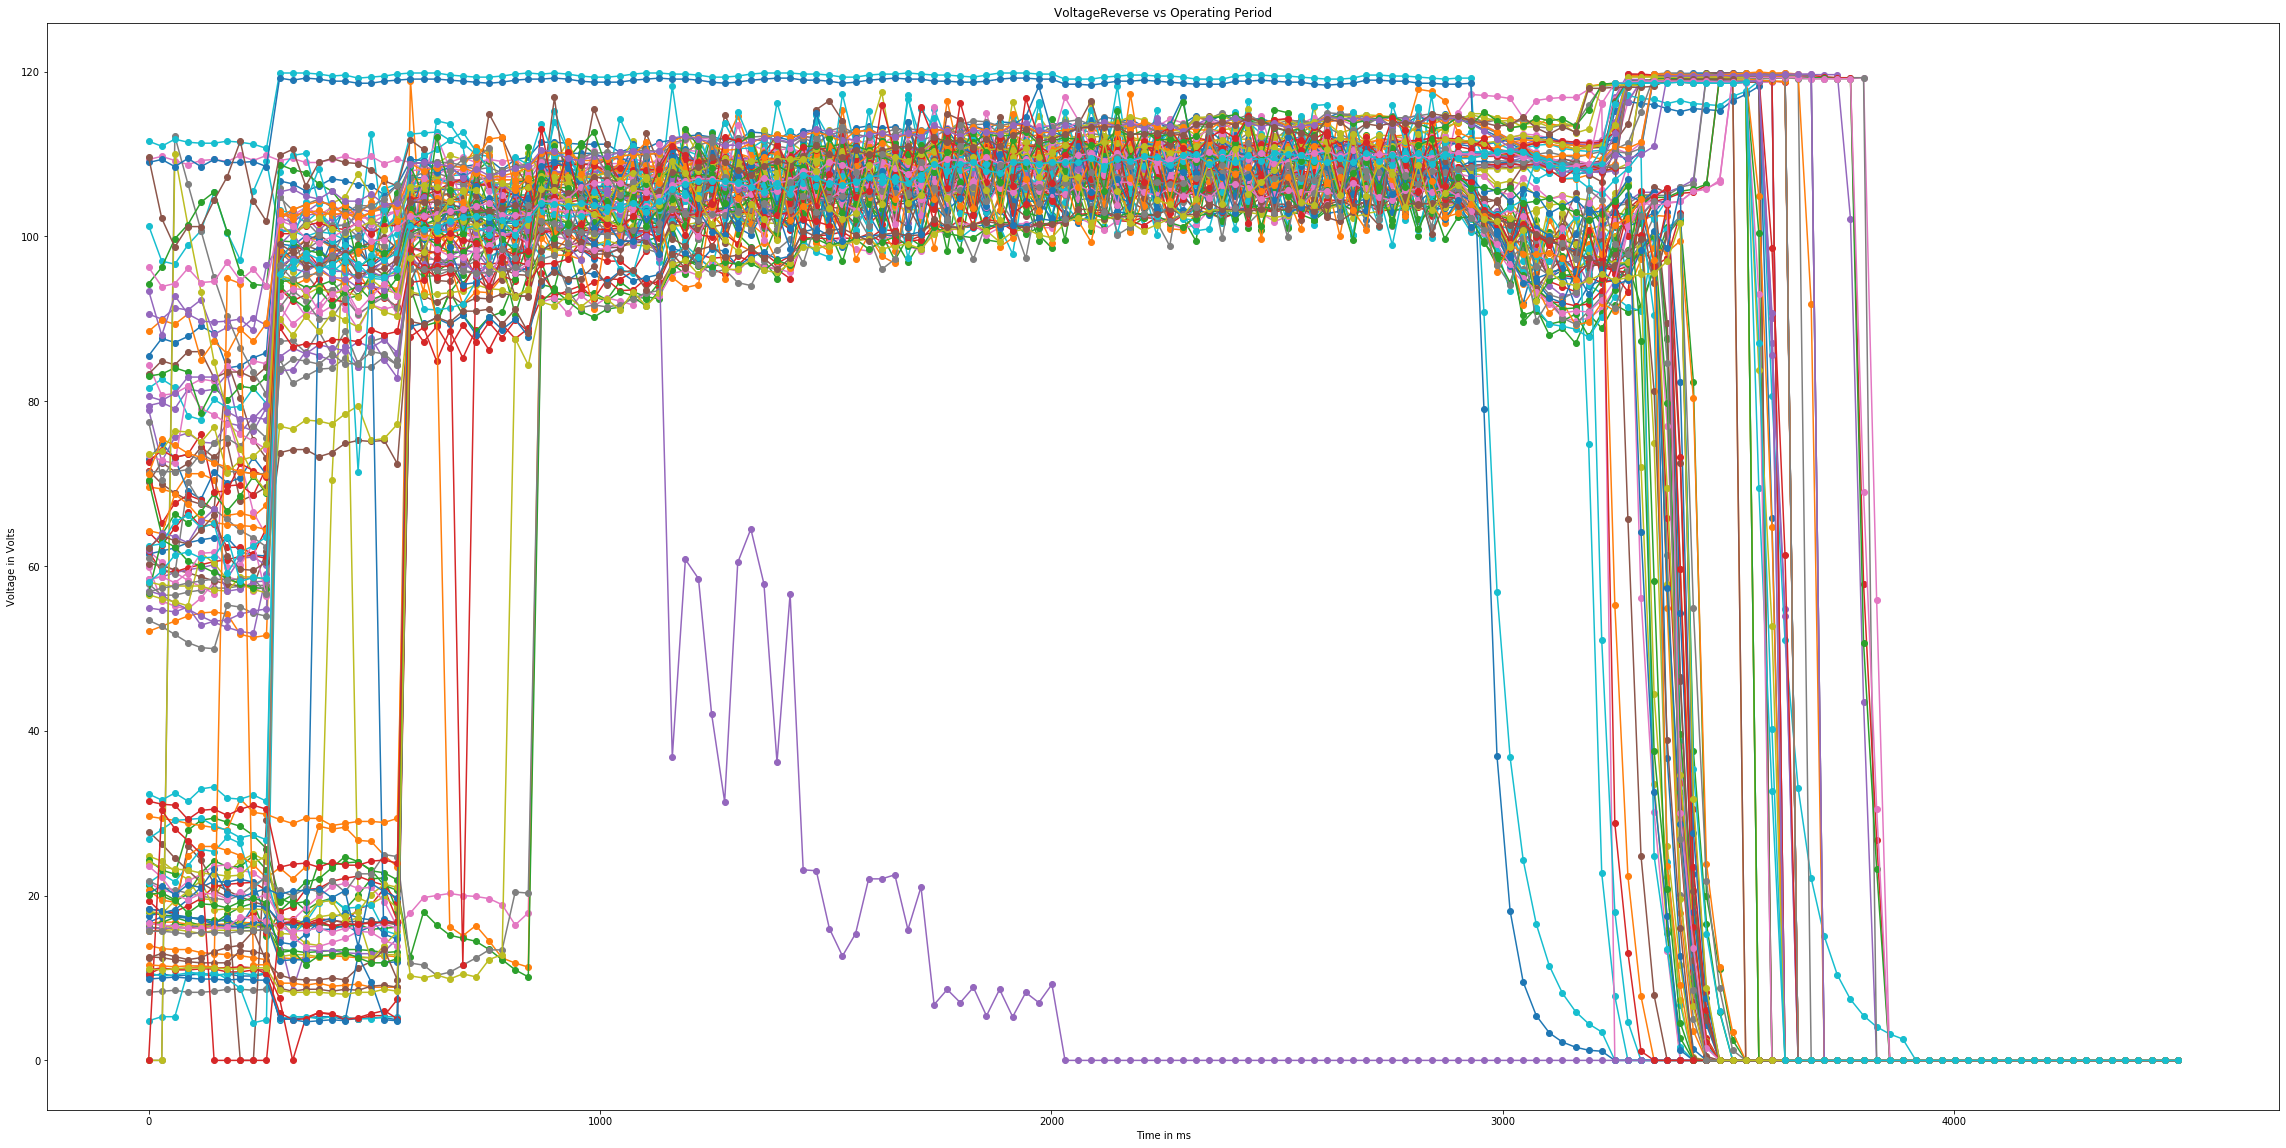

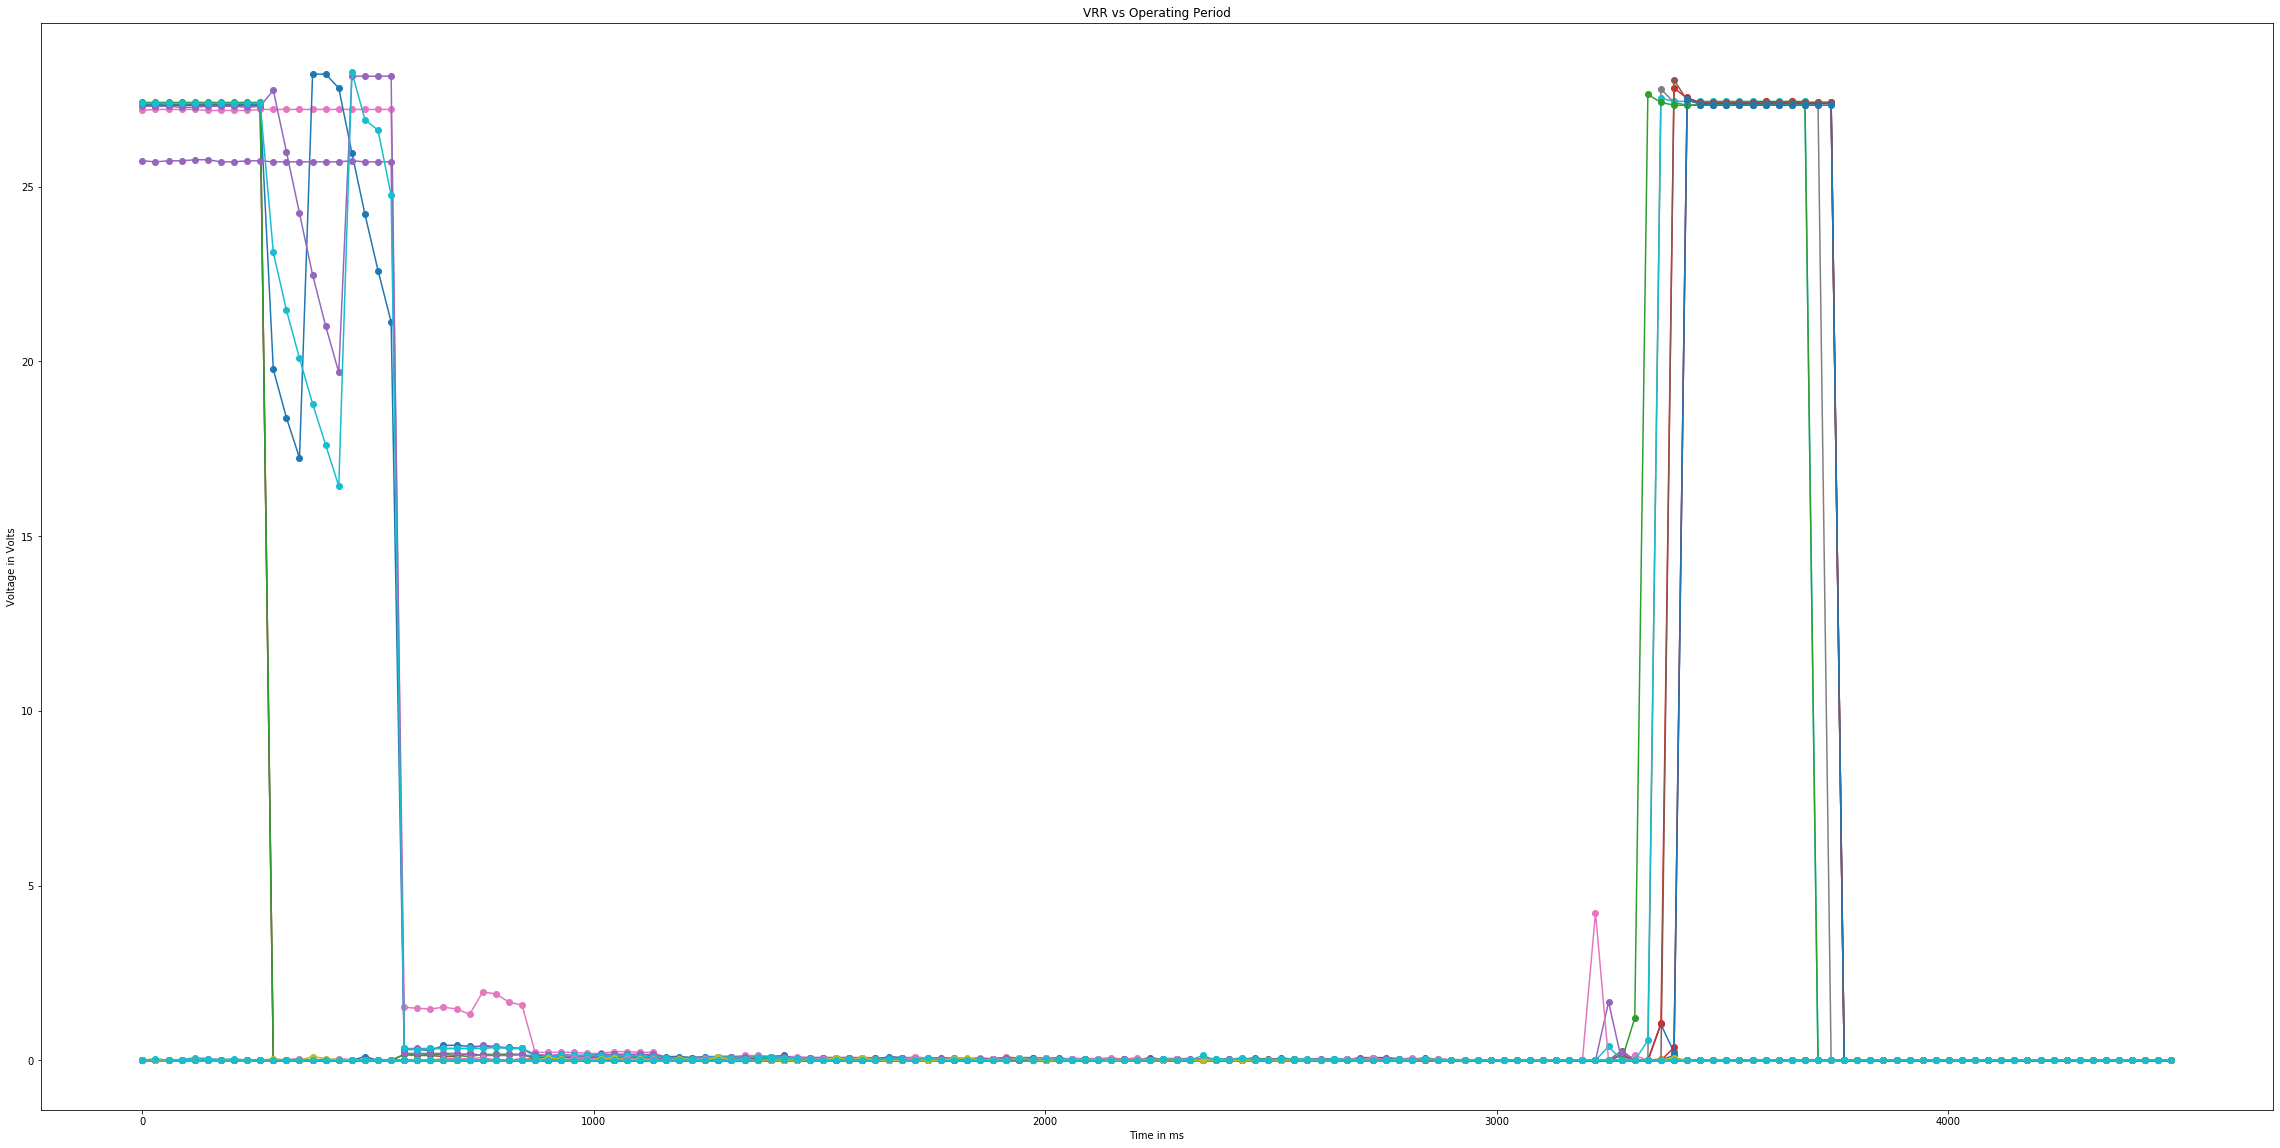

In [13]:
# Vizualizing VN
plt.figure(figsize=(40,20))
for row in range(df.shape[0]):
    plt.plot(reading_time, getParameter('VN', row), linestyle='-', marker='o')
plt.title("VoltageNormal vs Operating Period")
plt.xlabel("Time in ms")
plt.ylabel("Voltage in Volts")
plt.show()

# Vizualizing VR
plt.figure(figsize=(40,20))
for row in range(df.shape[0]):
    plt.plot(reading_time, getParameter('VR', row), linestyle='-', marker='o')
plt.title("VoltageReverse vs Operating Period")
plt.xlabel("Time in ms")
plt.ylabel("Voltage in Volts")
plt.show()

# Vizualizing VRR
plt.figure(figsize=(40,20))
for row in range(df.shape[0]):
    plt.plot(reading_time, getParameter('VRR', row), linestyle='-', marker='o')
plt.title("VRR vs Operating Period")
plt.xlabel("Time in ms")
plt.ylabel("Voltage in Volts")
plt.show()

## Observation
 - Voltage is disturbing when the motor starts *(around 0.6 sec)* and then it adapts to kind of constant voltage around 100V

# 5) Finding the values of IP, VN and VR that can be said as good working current and voltage for the machine
I am here making an assumption that our machine mostly works fine. So that by statestical analysis I can find the most comfortable working range.
### It is observed that in working peroid of 4 sec. The Machine works in three phases 0-1sec 1-3sec and 3sec onwards

In [14]:
""" A function that returns all the reading in the given time interval with a parameter name"""
def getDataInIntervalOfTime(lower_bound, upper_bound, parameter):
    req_data = list()
    for row in range(df.shape[0]):
        list_events = df['EventData'][row]
        list_events = ast.literal_eval(list_events)
        req_parameter = list()
        for i in range(len(list_events)):
            if lower_bound <= reading_time[i] <= upper_bound:
                req_parameter.append(float(list_events[i][parameter]))

        req_data.extend(req_parameter)
    return req_data

""" To draw freqency distribution """
def plotDistribution(data, title, bin_size = 50, col = 'blue'):
    plt.figure(figsize=(30,10))
    sns.distplot(data, bins = bin_size, color = col)
    plt.title(title)
    plt.show()

## Phase I => 0 - 1 sec

In [15]:
# 0-1 sec data
ip_0_to_1 = getDataInIntervalOfTime(0, 1000, 'IP')
vn_0_to_1 = getDataInIntervalOfTime(0, 1000, 'VN')
vr_0_to_1 = getDataInIntervalOfTime(0, 1000, 'VR')

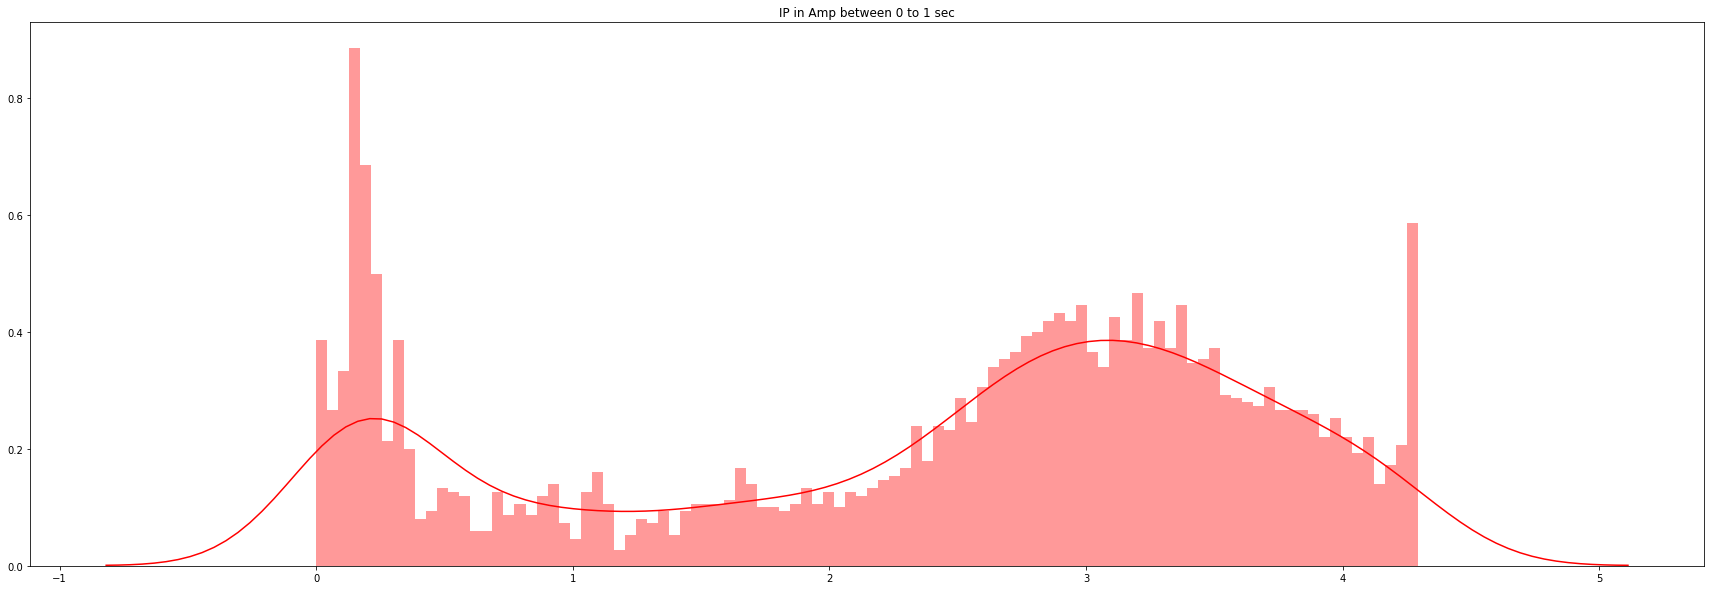

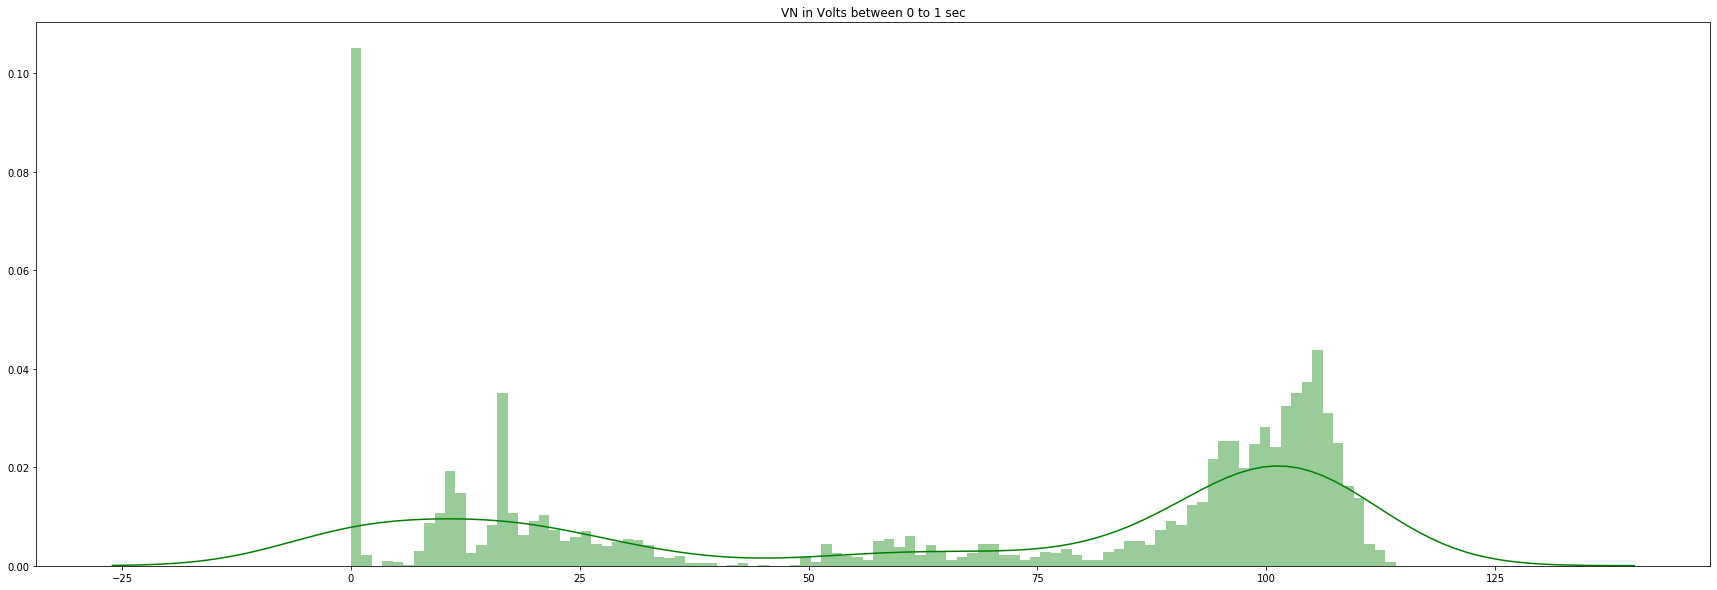

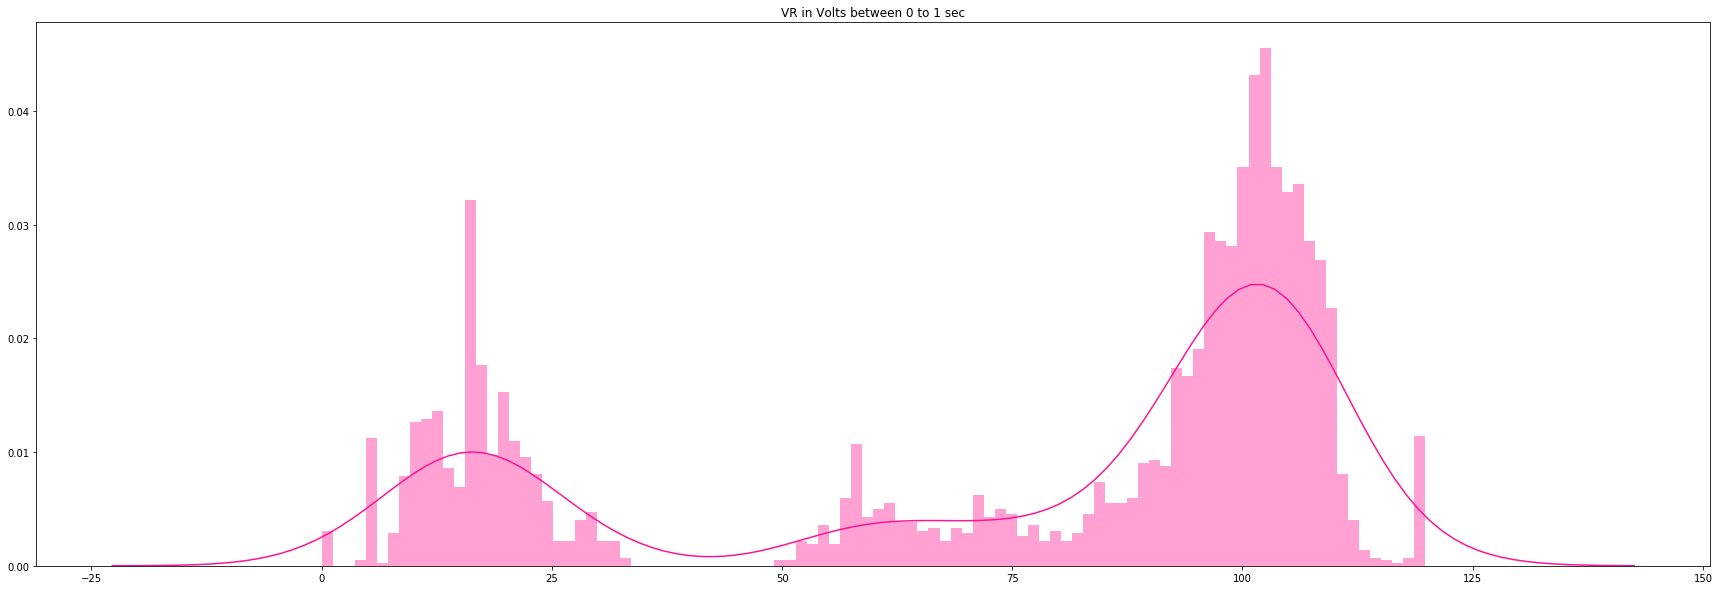

In [16]:
plotDistribution(ip_0_to_1, "IP in Amp between 0 to 1 sec", bin_size=100, col = 'red')
plotDistribution(vn_0_to_1, "VN in Volts between 0 to 1 sec", bin_size=100, col = 'green')
plotDistribution(vr_0_to_1, "VR in Volts between 0 to 1 sec", bin_size=100, col = 'deeppink')

Not very significant pattern current shows a very high low distribution same for vn and vr

## Phase I => 1 - 3 sec

In [17]:
# 1-3 sec data
ip_1_to_3 = getDataInIntervalOfTime(1000, 3000, 'IP')
vn_1_to_3 = getDataInIntervalOfTime(1000, 3000, 'VN')
vr_1_to_3 = getDataInIntervalOfTime(1000, 3000, 'VR')

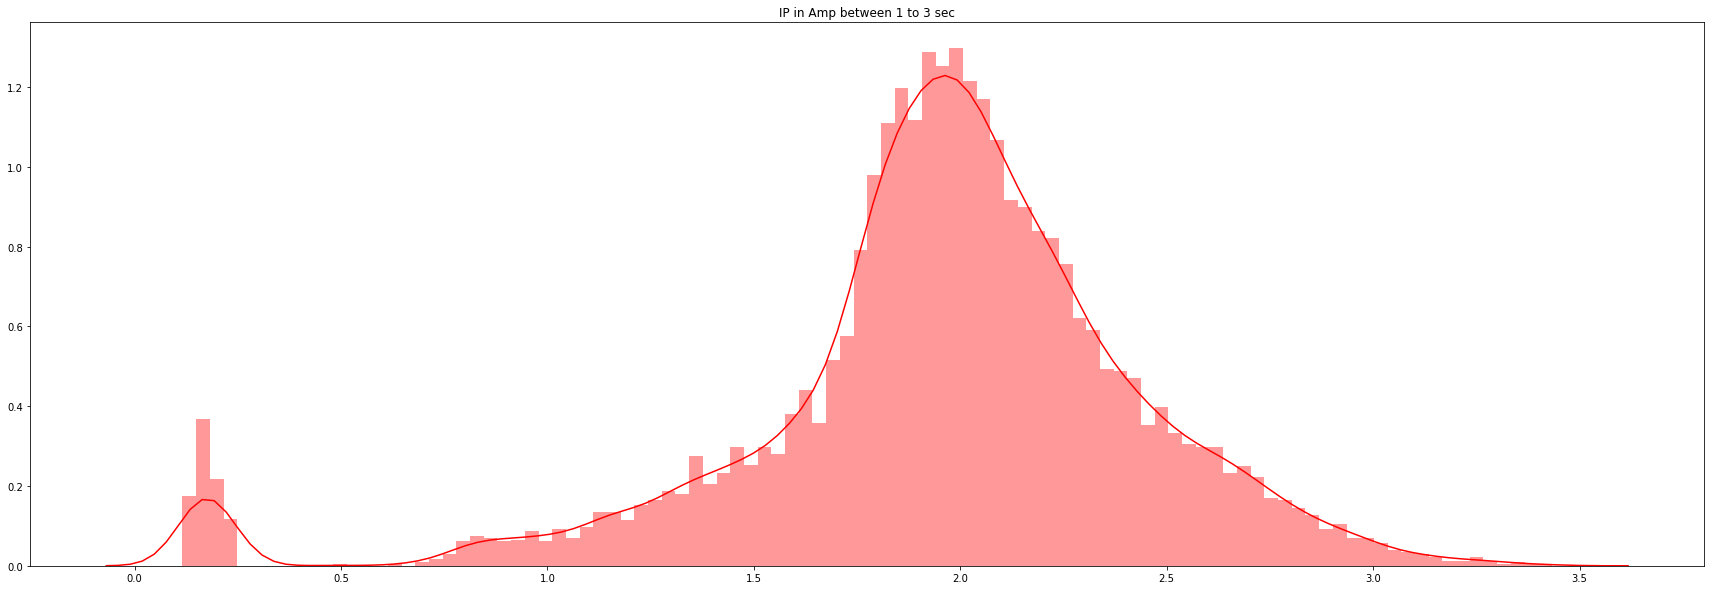

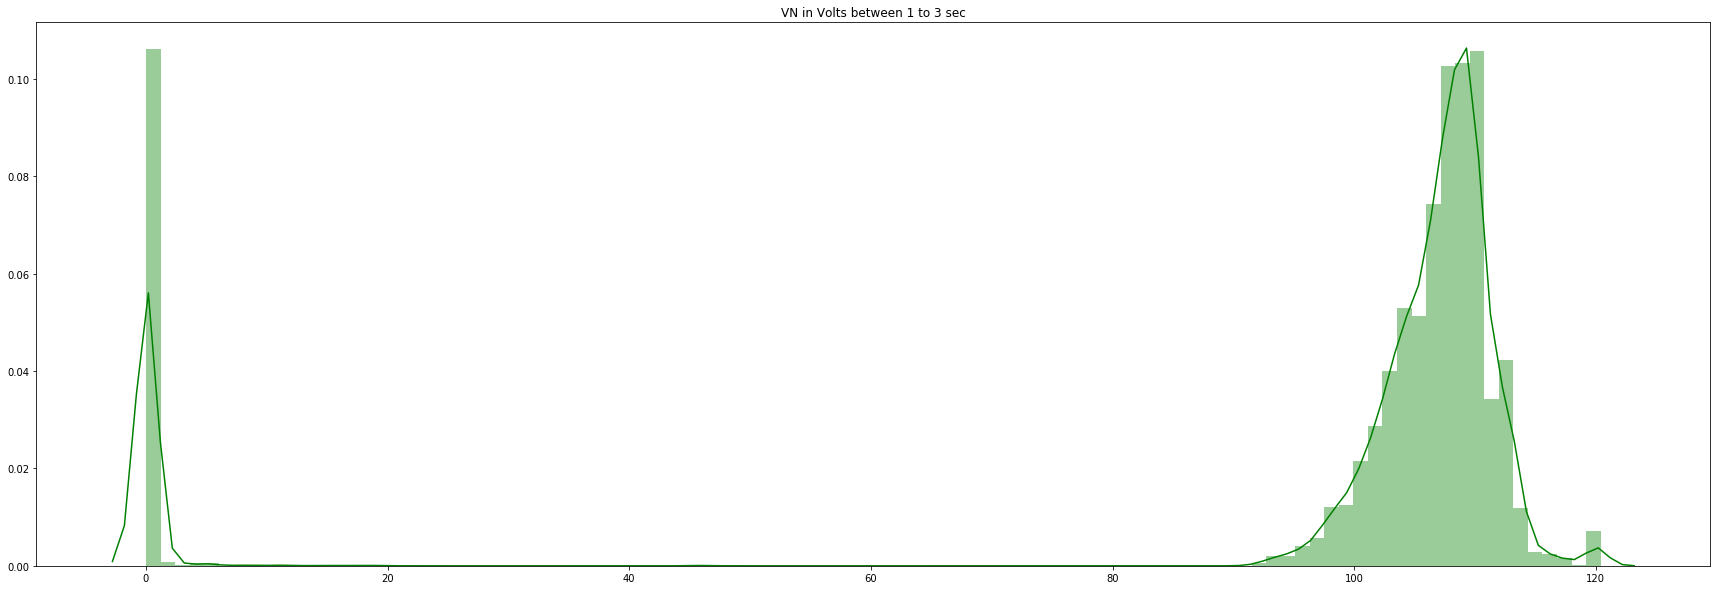

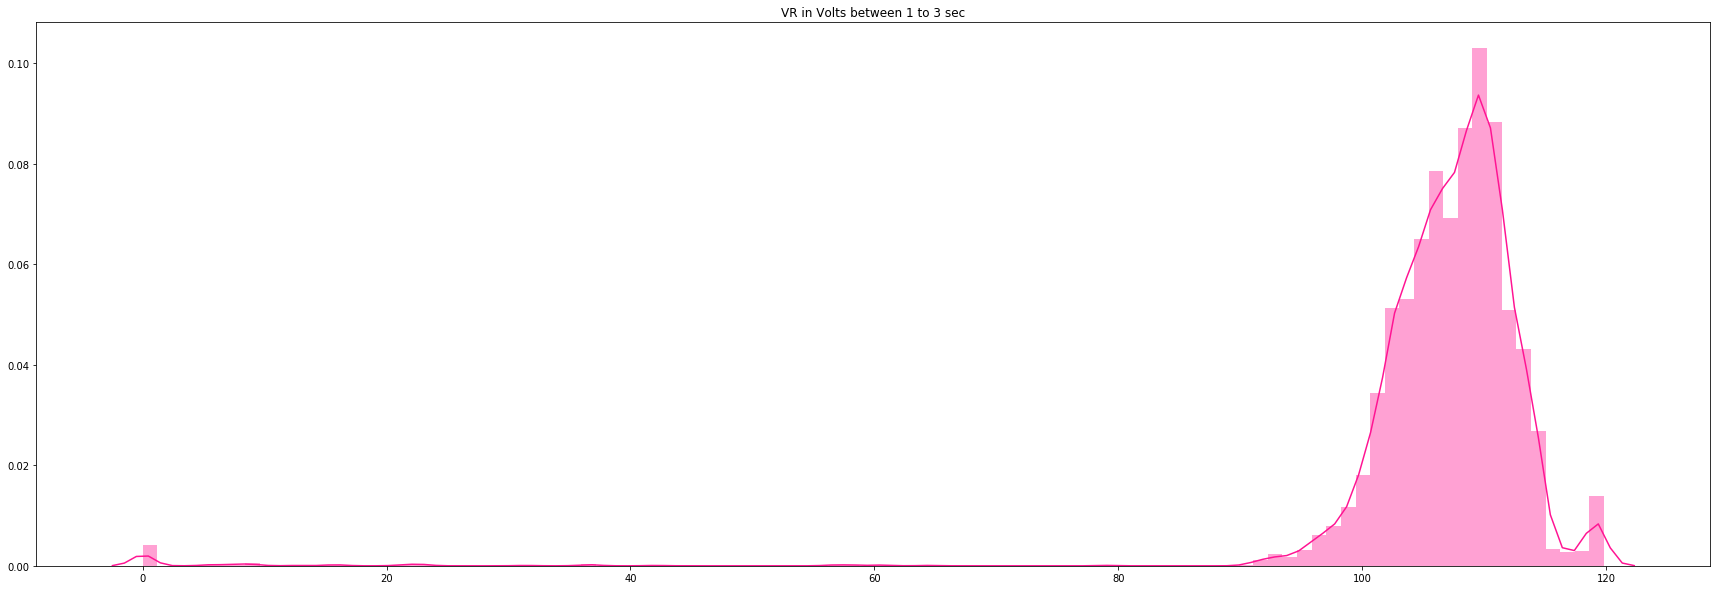

In [18]:
plotDistribution(ip_1_to_3, "IP in Amp between 1 to 3 sec", bin_size=100, col = 'red')
plotDistribution(vn_1_to_3, "VN in Volts between 1 to 3 sec", bin_size=100, col = 'green')
plotDistribution(vr_1_to_3, "VR in Volts between 1 to 3 sec", bin_size=100, col = 'deeppink')

Kind of bell shape graph. The distribution is good

## Phase I => 3 sec  onwards

In [19]:
# 3 sec onward data
ip_3_onwards = getDataInIntervalOfTime(3000, 5000, 'IP')
vn_3_onwards = getDataInIntervalOfTime(3000, 5000, 'VN')
vr_3_onwards = getDataInIntervalOfTime(3000, 5000, 'VR')

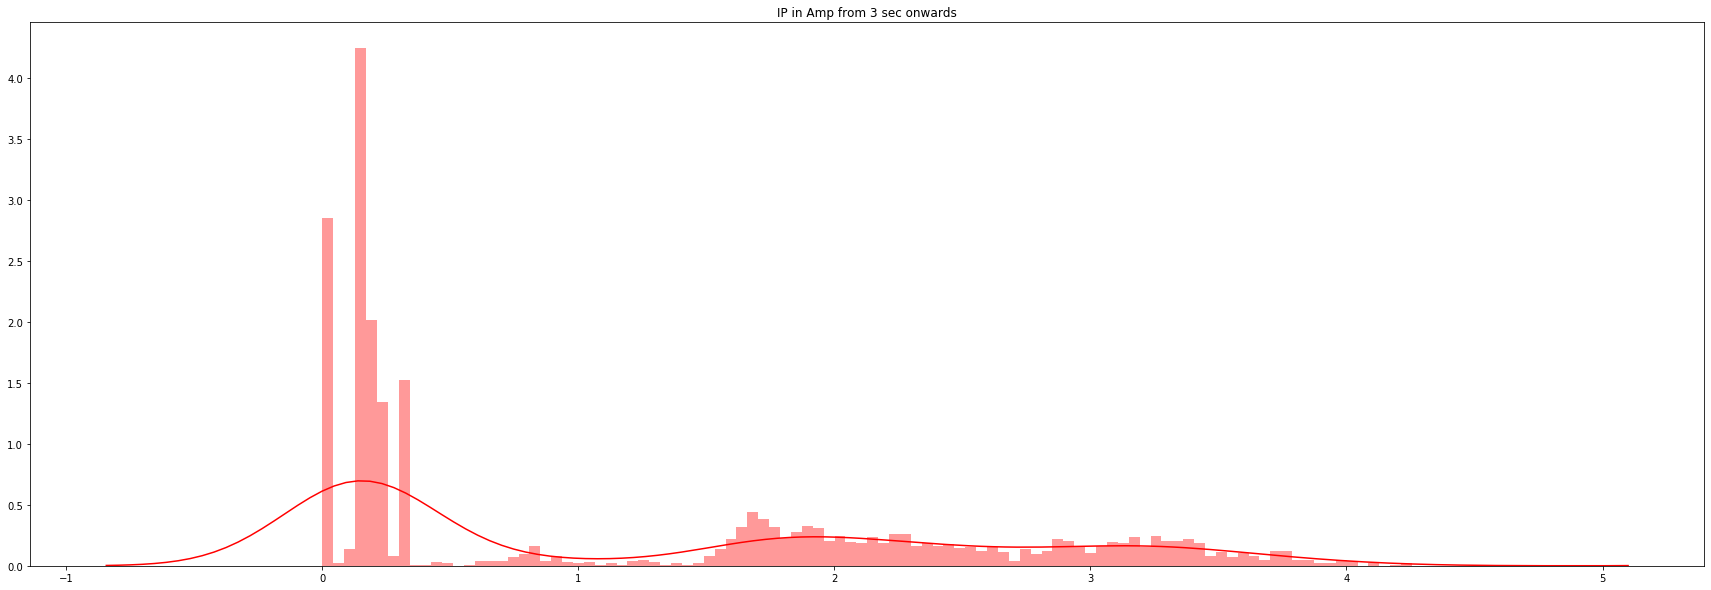

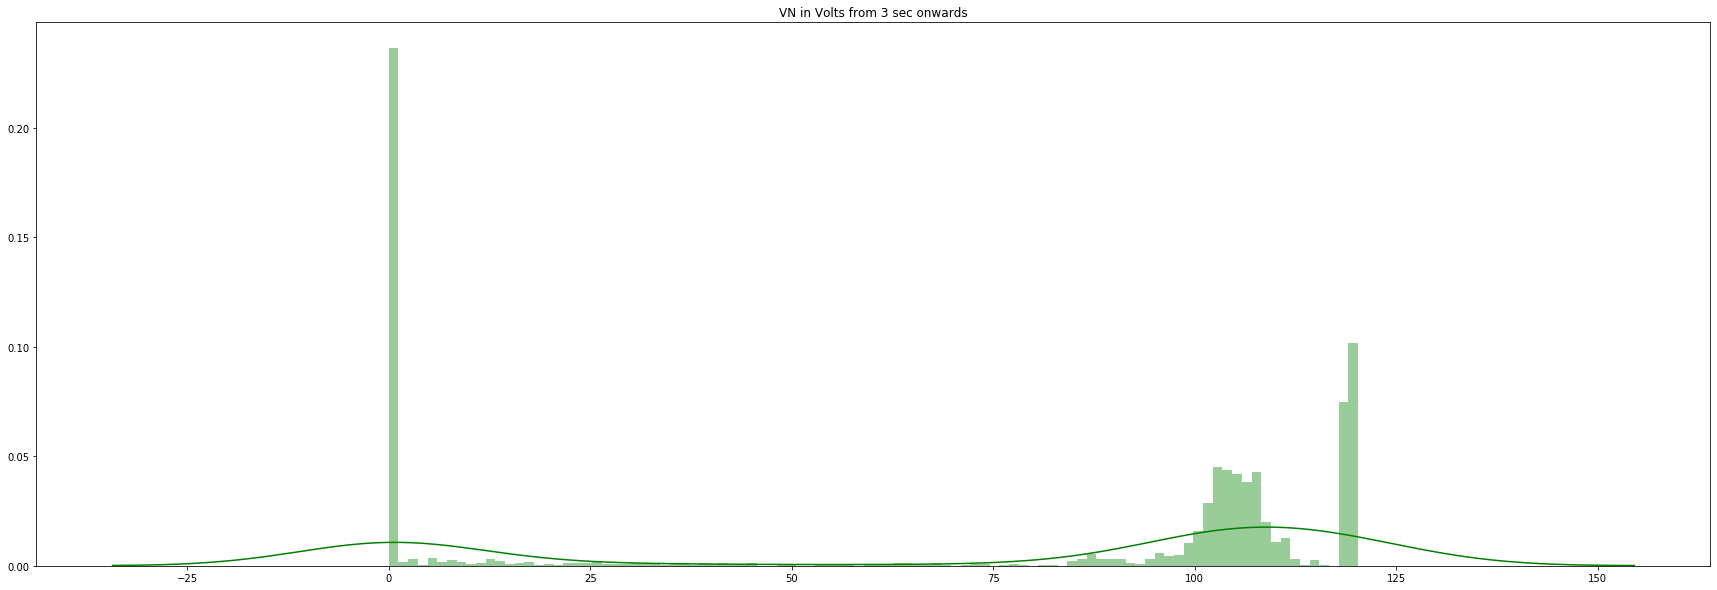

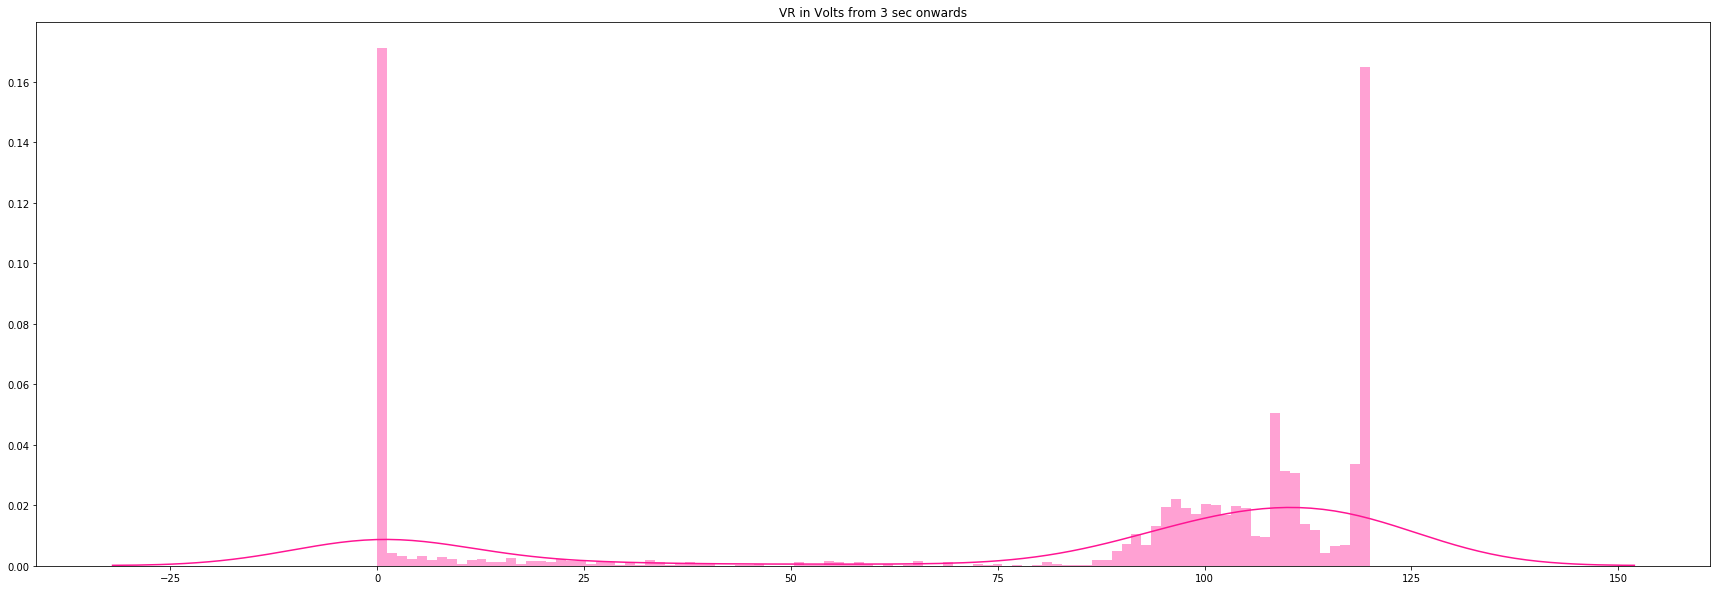

In [20]:
plotDistribution(ip_3_onwards, "IP in Amp from 3 sec onwards", bin_size=100, col = 'red')
plotDistribution(vn_3_onwards, "VN in Volts from 3 sec onwards", bin_size=100, col = 'green')
plotDistribution(vr_3_onwards, "VR in Volts from 3 sec onwards", bin_size=100, col = 'deeppink')

## Overall Graphs from 0-4 sec

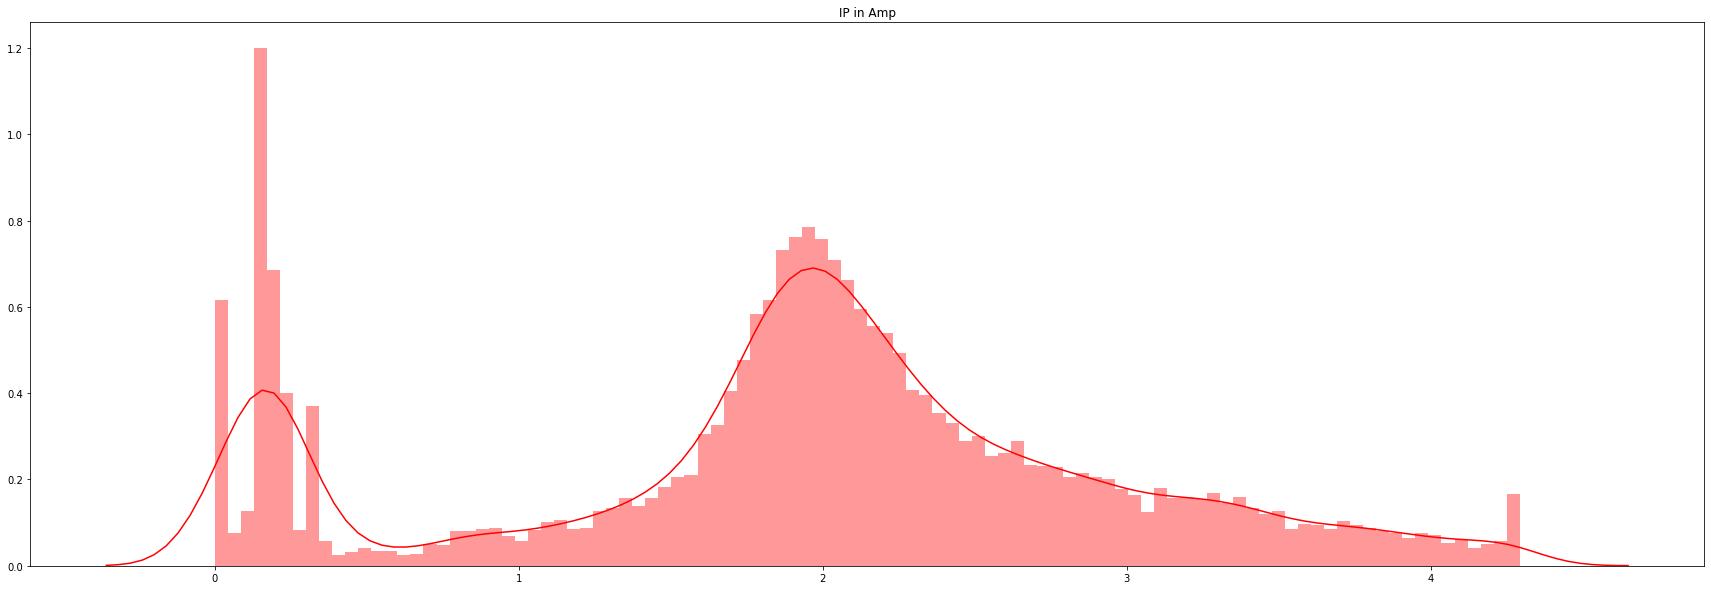

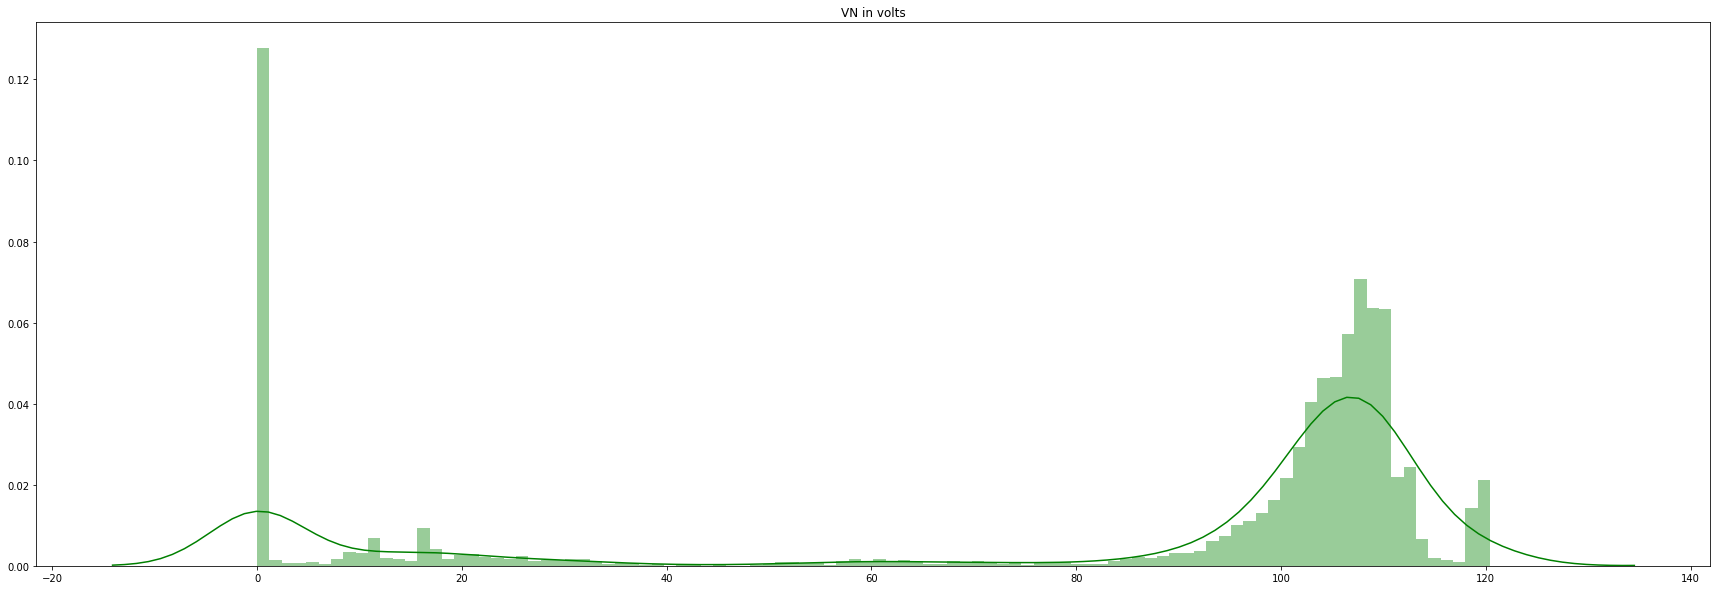

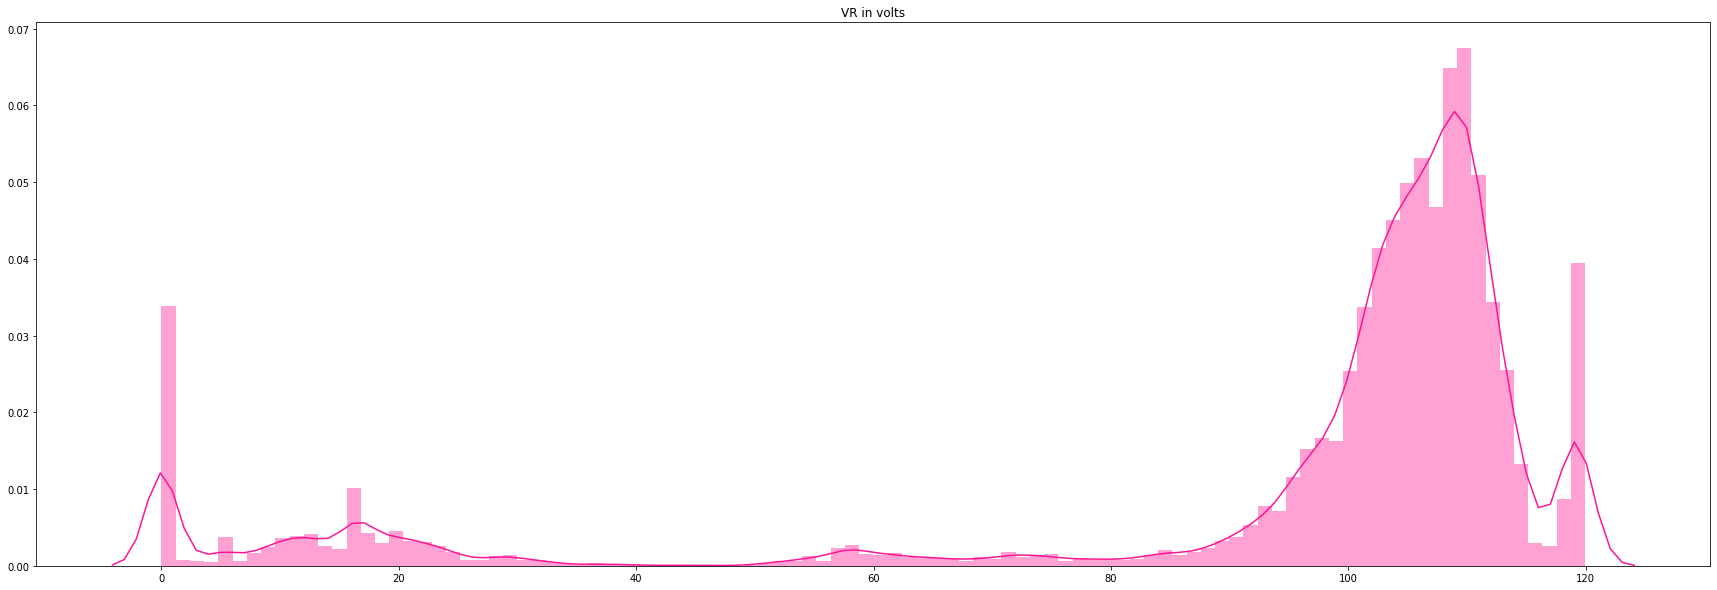

In [21]:
plotDistribution(ip_0_to_1 + ip_1_to_3 + ip_3_onwards, "IP in Amp", bin_size=100, col = 'red')
plotDistribution(vn_0_to_1 + vn_1_to_3 + vn_3_onwards, "VN in volts", bin_size=100, col = 'green')
plotDistribution(vr_0_to_1 + vr_1_to_3 + vr_3_onwards, "VR in volts", bin_size=100, col = 'deeppink')

## Sumarrizing the data
**Arranging the data according to the Operating Period**

In [22]:
def getListData(ind):
    req_ip = list()
    req_vn = list()
    req_vr = list()
    for row in range(df.shape[0]):
        list_events = df['EventData'][row]
        list_events = ast.literal_eval(list_events)
        try:
            req_ip.append(list_events[ind]['IP'])
        except:
            req_ip.append(0)
            
        try:
            req_vn.append(list_events[ind]['VN'])
        except:
            req_vn.append(0)
            
        try:
            req_vr.append(list_events[ind]['VR'])
        except:
            req_vr.append(0)
            
    return [float(elm) for elm in req_ip], [float(elm) for elm in req_vn], [float(elm) for elm in req_vr]

def createDataForModel():
    new_df = {
        'InstantTime' : [],
        'IP_at_time_t' : [],
        'VN_at_time_t' : [],
        'VR_at_time_t' : []
    }
    
    for i in tqdm(range(len(reading_time))):
        new_df['InstantTime'].append(reading_time[i])
        ip, vn, vr = getListData(i)
        new_df['IP_at_time_t'].append(stat.median(ip))
        new_df['VN_at_time_t'].append(stat.median(vn))
        new_df['VR_at_time_t'].append(stat.median(vr))
    return pd.DataFrame(new_df)
new_df = createDataForModel()

100%|██████████| 156/156 [00:53<00:00,  2.91it/s]


In [23]:
print(new_df.head())
print(new_df.tail())

   InstantTime  IP_at_time_t  VN_at_time_t  VR_at_time_t
0          0.0        0.2185        29.860        55.715
1         29.0        0.2235        31.530        55.210
2         58.0        0.2475        33.380        55.575
3         87.0        1.2625        33.250        55.100
4        116.0        1.5570        32.515        56.600
     InstantTime  IP_at_time_t  VN_at_time_t  VR_at_time_t
151       4379.0           0.0           0.0           0.0
152       4408.0           0.0           0.0           0.0
153       4437.0           0.0           0.0           0.0
154       4466.0           0.0           0.0           0.0
155       4495.0           0.0           0.0           0.0


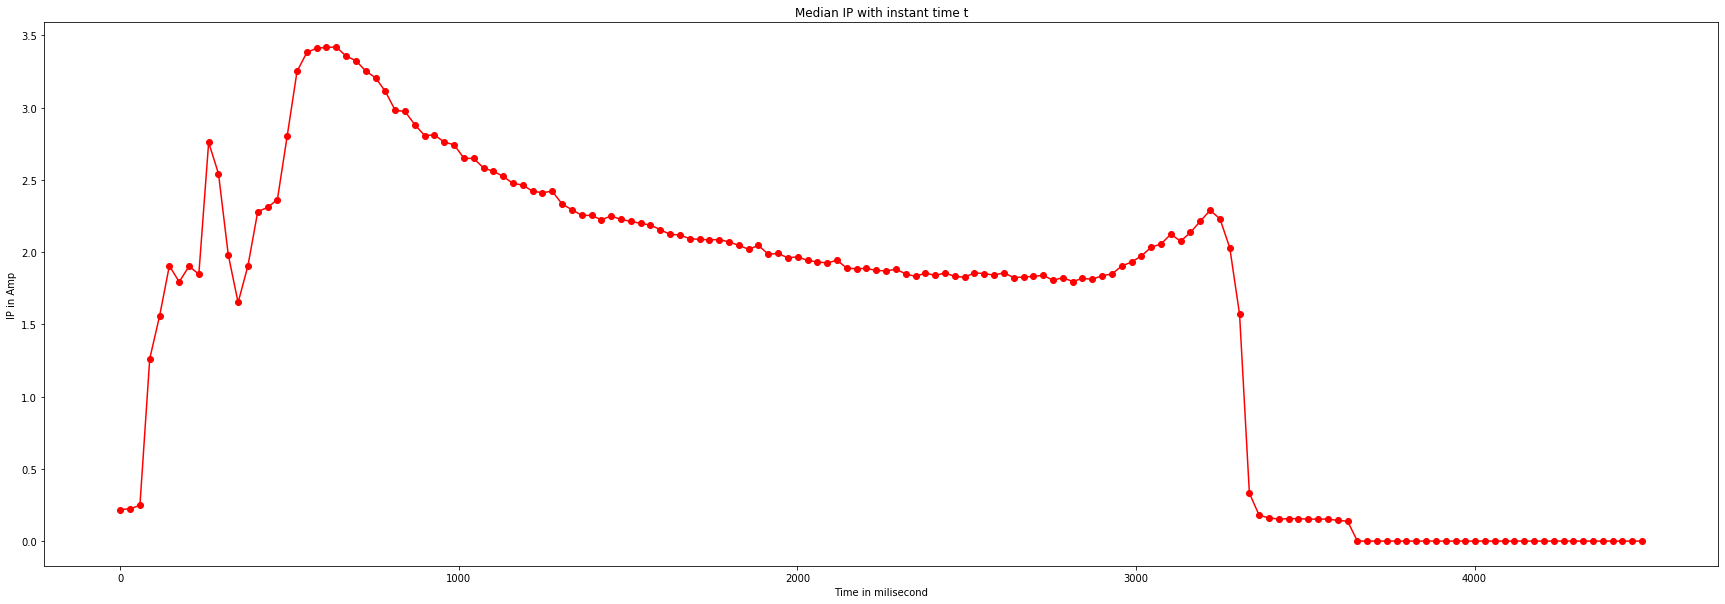

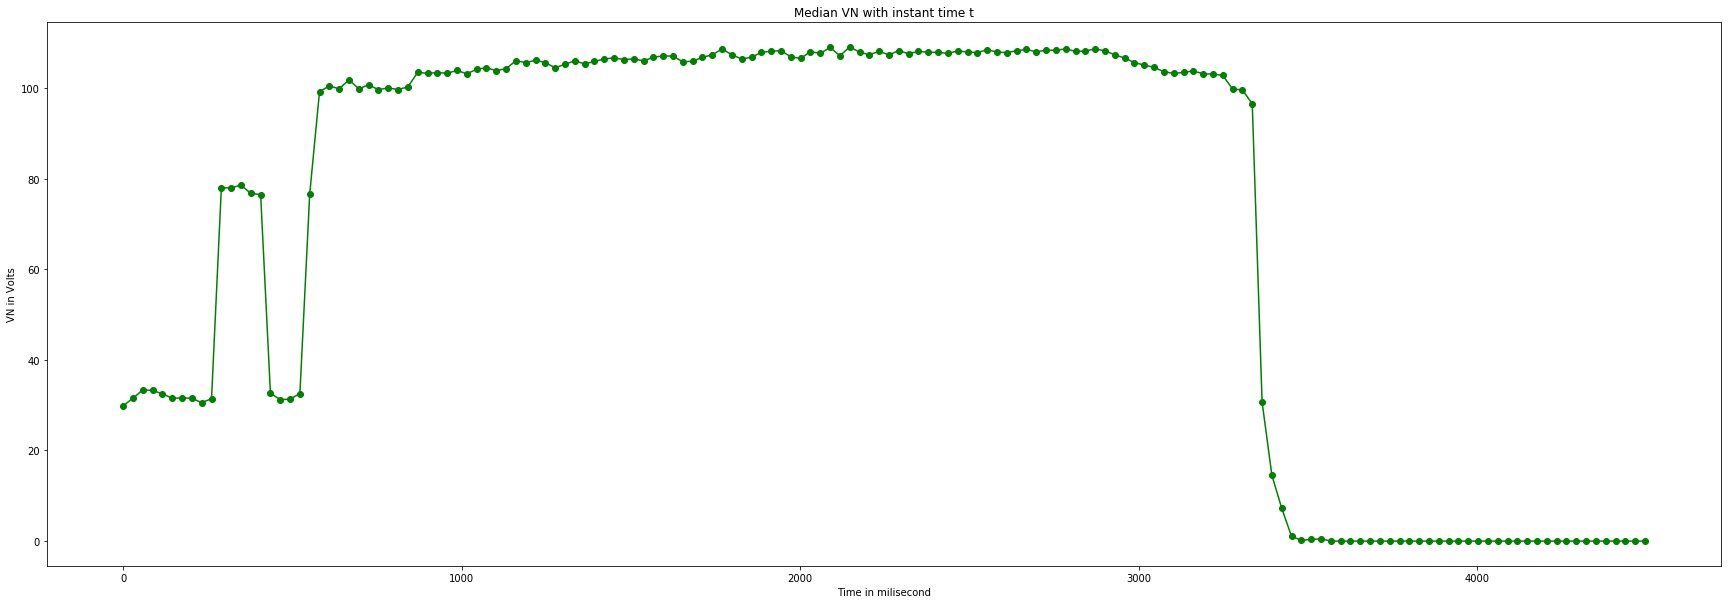

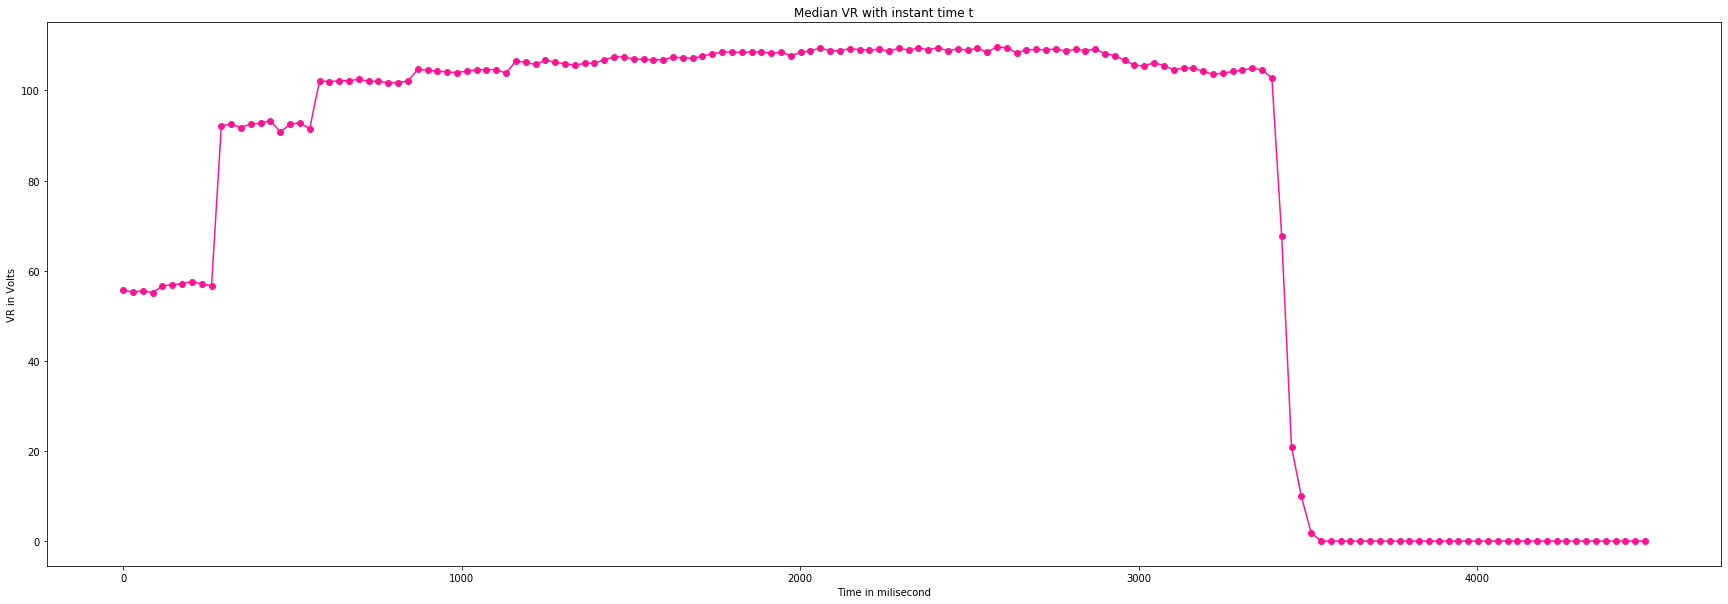

In [24]:
def plotData(y,x,graph_title = "", xlab = "", ylab = "", col = 'blue'):
    plt.figure(figsize=(30,10))
    plt.plot(x,y, linestyle='-', marker='o', color = col)
    plt.title(graph_title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
plotData(new_df['IP_at_time_t'], new_df['InstantTime'], "Median IP with instant time t", xlab="Time in milisecond", ylab="IP in Amp", col = 'red')
plotData(new_df['VN_at_time_t'], new_df['InstantTime'], "Median VN with instant time t", xlab="Time in milisecond", ylab="VN in Volts", col = 'green')
plotData(new_df['VR_at_time_t'], new_df['InstantTime'], "Median VR with instant time t", xlab="Time in milisecond", ylab="VR in Volts", col = 'deeppink')

In [25]:
""" A function that return the value at instant of time t from statistical analysis of the data """
def getPointMachineReading(time_milisec):
    if time_milisec > 4500:
        raise ValueError("Time exceeded from normal range of Operating Period of machine")
    t = np.round(time_milisec/time_gap)
    row = new_df.index[new_df['InstantTime'] == t*time_gap].tolist()
    row = row[0]
    return {'IP' : new_df['IP_at_time_t'][row], 'VN' : new_df['VN_at_time_t'][row], 'VR' : new_df['VR_at_time_t'][row]}

## Analysing the model by predicting some random time in Operating Period

In [26]:
random_time = [randint(0,4500) for i in range(10)]

for t in random_time:
    print(f"time = {t} and data = {getPointMachineReading(t)}")

time = 2217 and data = {'IP': 1.8875, 'VN': 107.36, 'VR': 108.97}
time = 1763 and data = {'IP': 2.087, 'VN': 108.6, 'VR': 108.47}
time = 465 and data = {'IP': 2.3635, 'VN': 31.215, 'VR': 90.765}
time = 380 and data = {'IP': 1.905, 'VN': 76.74000000000001, 'VR': 92.555}
time = 21 and data = {'IP': 0.2235, 'VN': 31.53, 'VR': 55.21}
time = 2782 and data = {'IP': 1.8235000000000001, 'VN': 108.645, 'VR': 108.72}
time = 4498 and data = {'IP': 0.0, 'VN': 0.0, 'VR': 0.0}
time = 3765 and data = {'IP': 0.0, 'VN': 0.0, 'VR': 0.0}
time = 3712 and data = {'IP': 0.0, 'VN': 0.0, 'VR': 0.0}
time = 2726 and data = {'IP': 1.8395000000000001, 'VN': 108.35, 'VR': 108.965}
